<a href="https://colab.research.google.com/github/sainirajesh17/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Importing Dataset

In [1]:
#Importing important libraries

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset

dataset_x = pd.read_excel('/content/drive/MyDrive/DATA_SCIENCE_THINGS/Data_Science_Alma_Better/Unsupervised ML Model/Copy of Online Retail.xlsx')

In [4]:
dataset = dataset_x.sample(100000, random_state = 42)
df_fix=dataset_x.sample(100000, random_state = 42)

In [5]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [6]:
dataset.shape

(100000, 8)

# Data Inspection

In [7]:
# Checking tail fo the dataset
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
242085,C558313,22629,SPACEBOY LUNCH BOX,-1,2011-06-28 11:31:00,1.95,13870.0,United Kingdom
435441,574074,90186B,CRYSTAL HOOP EARRING FLORAL LEAF,1,2011-11-02 15:33:00,2.90,NaN,United Kingdom
275042,560929,21094,SET/6 RED SPOTTY PAPER PLATES,2,2011-07-22 10:06:00,0.85,16866.0,United Kingdom
430654,573585,22467,GUMBALL COAT RACK,4,2011-10-31 14:41:00,4.96,NaN,United Kingdom
290024,562347,22998,TRAVEL CARD WALLET KEEP CALM,4,2011-08-04 12:22:00,0.42,13263.0,United Kingdom


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 209268 to 290024
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    100000 non-null  object        
 1   StockCode    100000 non-null  object        
 2   Description  99723 non-null   object        
 3   Quantity     100000 non-null  int64         
 4   InvoiceDate  100000 non-null  datetime64[ns]
 5   UnitPrice    100000 non-null  float64       
 6   CustomerID   74983 non-null   float64       
 7   Country      100000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.9+ MB


In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,100000.0,9.413390,351.904849,-80995.00,1.00,3.00,10.00,74215.00
UnitPrice,100000.0,4.464044,86.567489,-11062.06,1.25,2.08,4.13,13541.33
CustomerID,74983.0,15285.249870,1715.869301,12346.00,13952.00,15142.00,16795.00,18287.00


In [10]:
# Checking null values
dataset['Description'].isnull().sum()

277

# Information of the Dataset

In [11]:
# Getting new features from Invoice_Date column

dataset['InvoiceDate_year'] = dataset['InvoiceDate'].dt.year
dataset['InvoiceDate_month'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceDate_day'] = dataset['InvoiceDate'].dt.day
dataset['InvoiceDate_hour'] = dataset['InvoiceDate'].dt.hour
dataset['InvoiceDate_minute'] = dataset['InvoiceDate'].dt.minute
dataset['InvoiceDate_second'] = dataset['InvoiceDate'].dt.second

In [12]:
print("Columns and data types")
pd.DataFrame(dataset.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


In [13]:
dataset. shape

(100000, 14)

In [14]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [15]:
dataset.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
count,100000.0,100000,99723,100000.000000,100000,100000.000000,74983.000000,100000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.0
unique,17962.0,3610,3697,NaN,16754,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN
freq,221.0,433,441,NaN,221,NaN,NaN,91262,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.413390,NaN,4.464044,15285.249870,NaN,2010.921920,7.544000,14.99623,13.081290,29.983010,0.0
std,NaN,NaN,NaN,351.904849,NaN,86.567489,1715.869301,NaN,0.268299,3.507693,8.66688,2.441774,16.985543,0.0
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,2010.000000,1.000000,1.00000,6.000000,0.000000,0.0
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13952.000000,NaN,2011.000000,5.000000,7.00000,11.000000,16.000000,0.0


In [16]:
# Getting list of all features having numerical data
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [17]:
# Getting list of all the features  having categorical data
categorical_columns=list(dataset.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [18]:
def unique_name_no(col):
  print(dataset[col].unique())
  print(dataset[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
[555200 554974 550972 ... 568460 'C558313' 560929]
17962
STOCKCODE
[71459 21128 21086 ... '90042A' '16169P' 72811]
3610
DESCRIPTION
['HANGING JAM JAR T-LIGHT HOLDER' 'GOLD FISHING GNOME'
 'SET/6 RED SPOTTY PAPER CUPS' ... 'CHEST NATURAL WOOD 20 DRAWERS'
 'FRESHWATER PEARL BRACELET GOLD' 'SMALL ZINC/GLASS CANDLEHOLDER']
3697
COUNTRY
['United Kingdom' 'Australia' 'Norway' 'Finland' 'Germany' 'Bahrain'
 'EIRE' 'Spain' 'France' 'Canada' 'RSA' 'Netherlands' 'Italy' 'Austria'
 'Channel Islands' 'Unspecified' 'Sweden' 'Belgium' 'Portugal' 'USA'
 'Cyprus' 'Poland' 'Switzerland' 'Japan' 'Denmark' 'Hong Kong' 'Iceland'
 'Singapore' 'Israel' 'United Arab Emirates' 'Greece' 'Lithuania'
 'European Community' 'Malta' 'Saudi Arabia' 'Lebanon' 'Czech Republic'
 'Brazil']
38


In [19]:
# duplicate
len(dataset[dataset.duplicated()])

200

In [20]:
dataset[dataset.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
270266,560555,20984,12 PENCILS TALL TUBE POSY,2,2011-07-19 13:01:00,0.29,14178.0,United Kingdom,2011,7,19,13,1,0
510482,579456,22624,IVORY KITCHEN SCALES,1,2011-11-29 14:20:00,8.50,13428.0,United Kingdom,2011,11,29,14,20,0
213179,555524,22697,GREEN REGENCY TEACUP AND SAUCER,1,2011-06-05 11:37:00,2.95,16923.0,United Kingdom,2011,6,5,11,37,0
370967,569205,22624,IVORY KITCHEN SCALES,1,2011-10-02 10:55:00,8.50,16923.0,United Kingdom,2011,10,2,10,55,0
375246,569424,22436,12 COLOURED PARTY BALLOONS,10,2011-10-04 10:49:00,0.65,15529.0,United Kingdom,2011,10,4,10,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409368,572058,22907,PACK OF 20 NAPKINS PANTRY DESIGN,1,2011-10-20 12:43:00,0.85,18252.0,United Kingdom,2011,10,20,12,43,0
360382,568226,23232,WRAP VINTAGE LEAF DESIGN,25,2011-09-26 10:39:00,0.42,16719.0,United Kingdom,2011,9,26,10,39,0
504413,578949,22629,SPACEBOY LUNCH BOX,1,2011-11-27 14:30:00,1.95,14954.0,United Kingdom,2011,11,27,14,30,0
49635,540524,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,8,2011-01-09 12:53:00,0.65,16735.0,United Kingdom,2011,1,9,12,53,0


In [21]:
# Dropping Duplicate rows
dataset=dataset.drop_duplicates()
len(dataset[dataset.duplicated()])

0

In [22]:
dataset.shape

(99800, 14)

In [23]:
dataset.isnull().sum()

InvoiceNo                 0
StockCode                 0
Description             277
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID            25017
Country                   0
InvoiceDate_year          0
InvoiceDate_month         0
InvoiceDate_day           0
InvoiceDate_hour          0
InvoiceDate_minute        0
InvoiceDate_second        0
dtype: int64

# Missing Value Imputation

**Handle Category Imputation**

**Frequent Category Imputation**

In [24]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [25]:
impute_nan(dataset,"Description")

**Handle Numerical Imputation**

**Random Sample Imputation (MCAR)**

In [26]:
def impute_nan_numeric(df,variable):
  df[variable+'_random']=df[variable]
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index= df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [27]:
impute_nan_numeric(dataset,'CustomerID')
dataset.drop(['CustomerID'],axis=1,inplace=True)

In [28]:
dataset.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
Country               0
InvoiceDate_year      0
InvoiceDate_month     0
InvoiceDate_day       0
InvoiceDate_hour      0
InvoiceDate_minute    0
InvoiceDate_second    0
CustomerID_random     0
dtype: int64

In [29]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,CustomerID_random
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,United Kingdom,2011,6,1,12,5,0,17315.0
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,United Kingdom,2011,5,27,17,14,0,14031.0
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,United Kingdom,2011,4,21,17,5,0,14031.0
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,United Kingdom,2011,11,16,10,39,0,17198.0
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,United Kingdom,2011,3,10,8,40,0,13502.0


In [30]:
dataset.shape

(99800, 14)

# Exploratory Data Analysis

**Handling Numeric Features**

In [31]:
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

**Univariate Analysis**

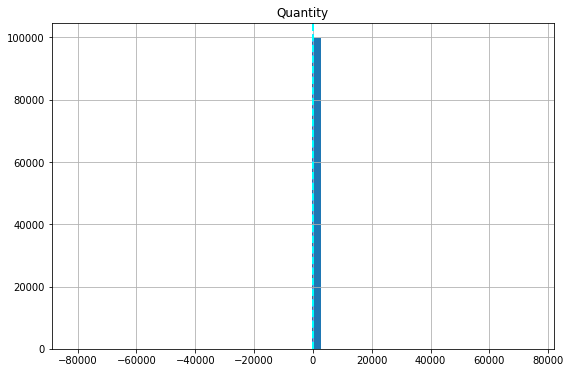

Skewness : -28.344569834381602
Kurtosis : 47758.64290721468


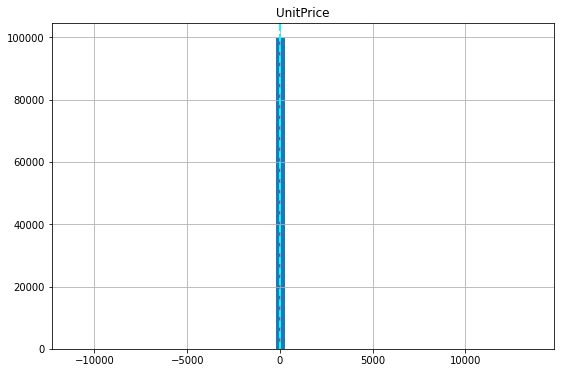

Skewness : 67.4174070631849
Kurtosis : 13735.513760204914


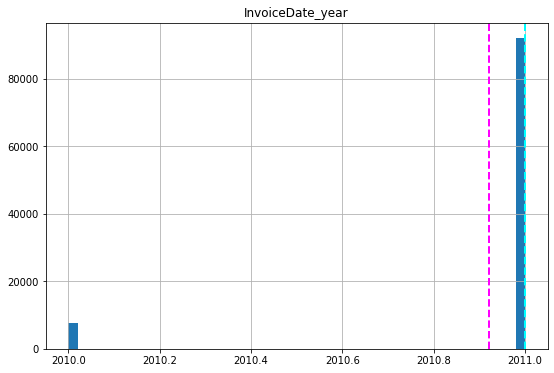

Skewness : -3.146091508565177
Kurtosis : 7.898050057421847


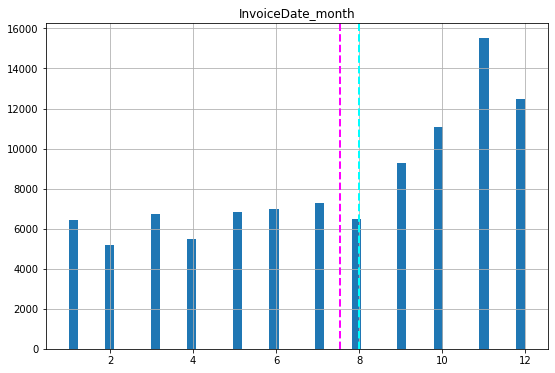

Skewness : -0.4089208811983102
Kurtosis : -1.122990398025394


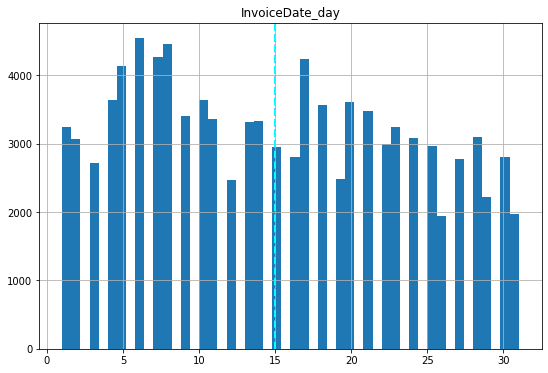

Skewness : 0.1447444352513377
Kurtosis : -1.1578925783110727


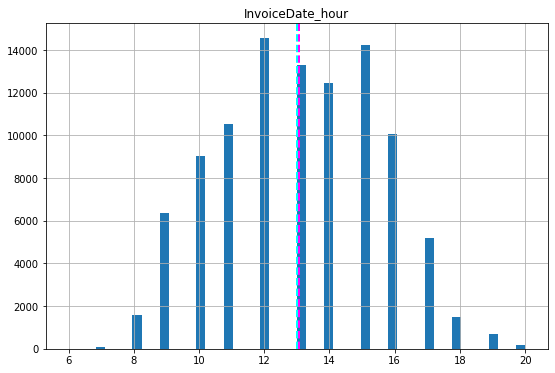

Skewness : 0.008697042520265109
Kurtosis : -0.6813692430256721


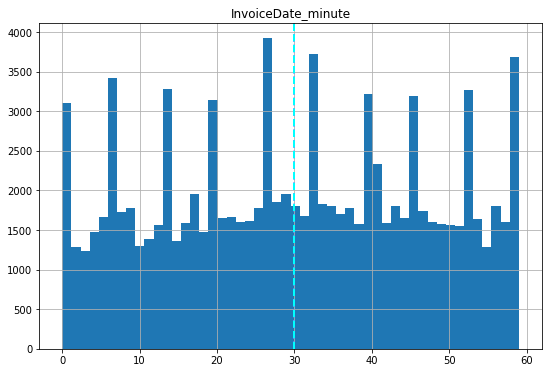

Skewness : -0.02913752892724055
Kurtosis : -1.138367174409329


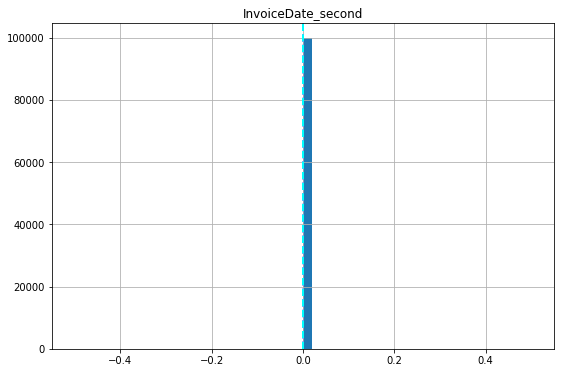

Skewness : 0
Kurtosis : 0


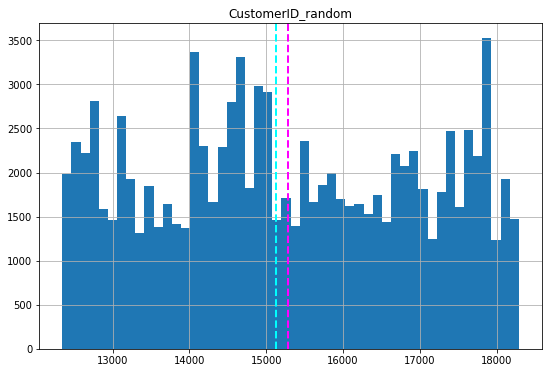

Skewness : 0.03522106597581507
Kurtosis : -1.182263036632357


In [32]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",dataset[col].skew())
  print( "Kurtosis :",dataset[col].kurt())

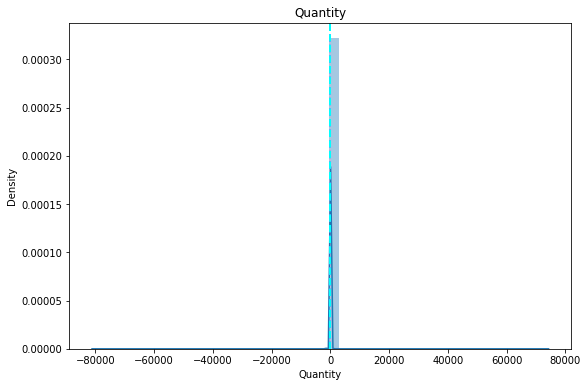

Skewness : -28.344569834381602
Kurtosis : 47758.64290721468


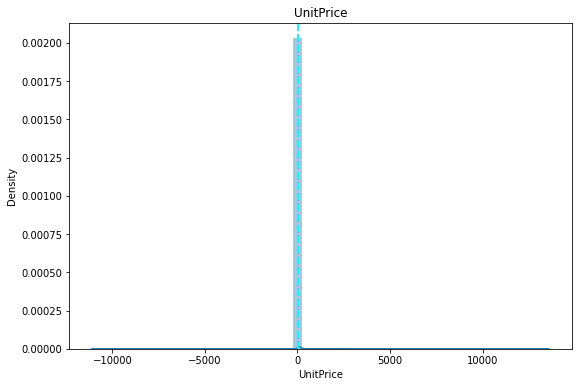

Skewness : 67.4174070631849
Kurtosis : 13735.513760204914


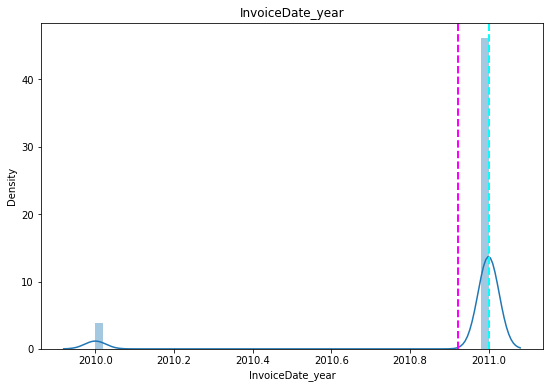

Skewness : -3.146091508565177
Kurtosis : 7.898050057421847


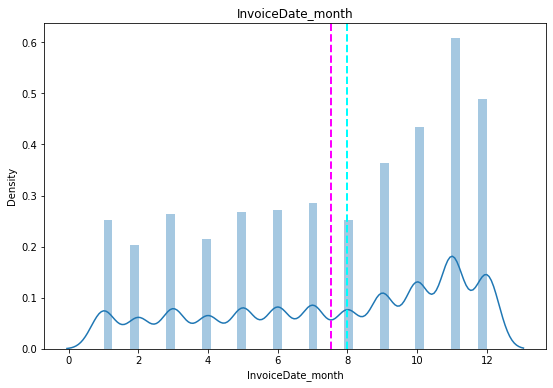

Skewness : -0.4089208811983102
Kurtosis : -1.122990398025394


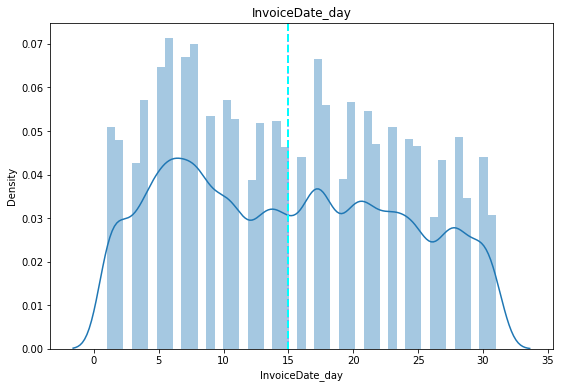

Skewness : 0.1447444352513377
Kurtosis : -1.1578925783110727


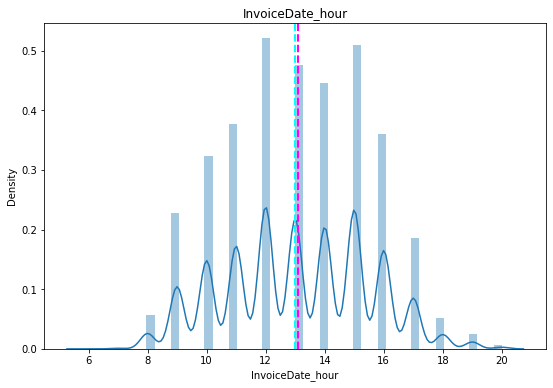

Skewness : 0.008697042520265109
Kurtosis : -0.6813692430256721


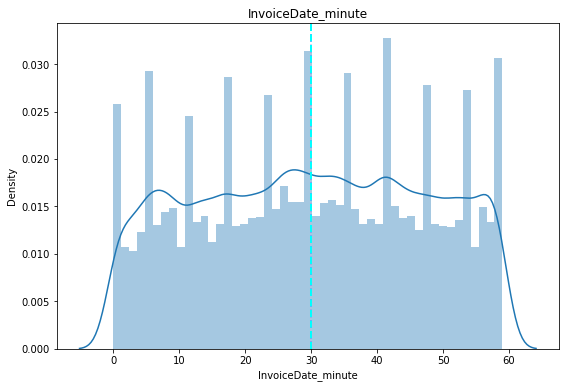

Skewness : -0.02913752892724055
Kurtosis : -1.138367174409329


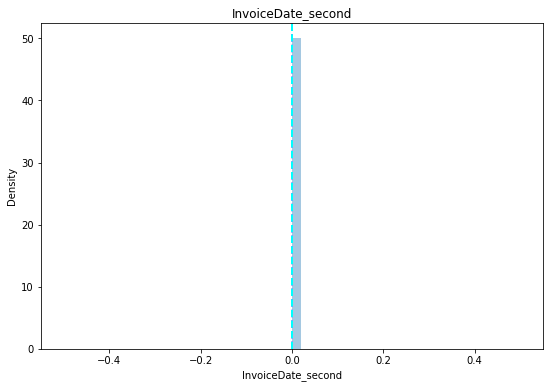

Skewness : 0
Kurtosis : 0


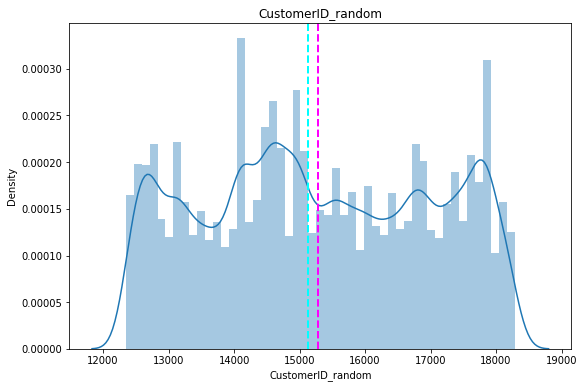

Skewness : 0.03522106597581507
Kurtosis : -1.182263036632357


In [33]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",dataset[col].skew())
  print( "Kurtosis :",dataset[col].kurt())

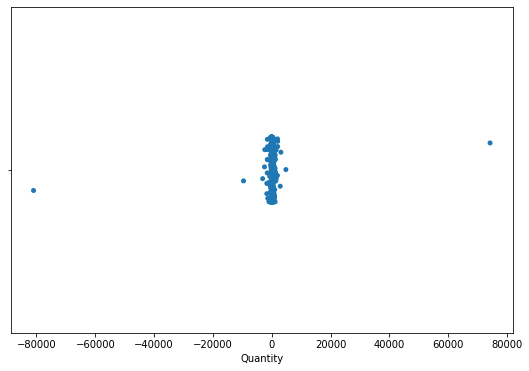

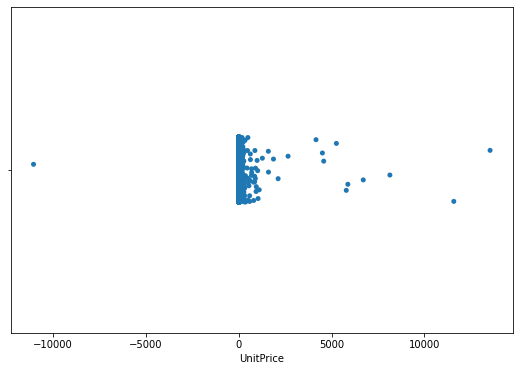

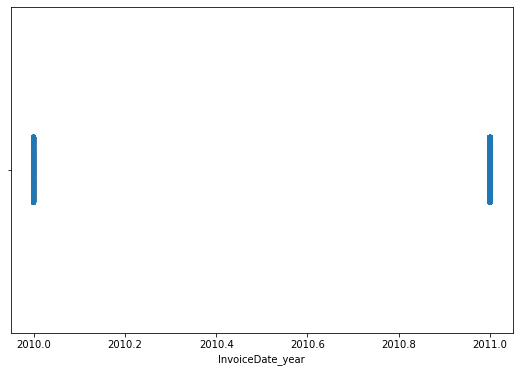

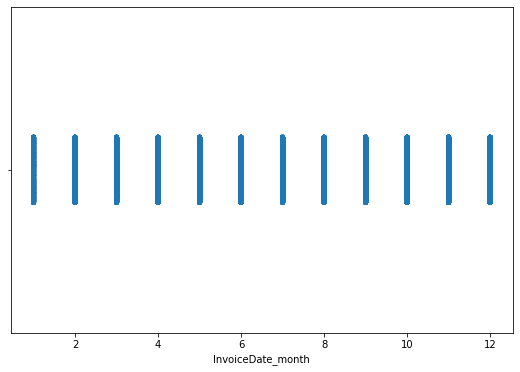

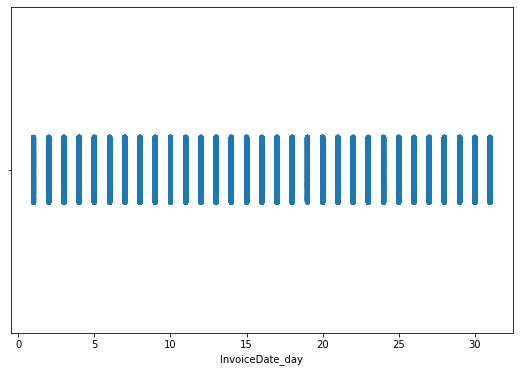

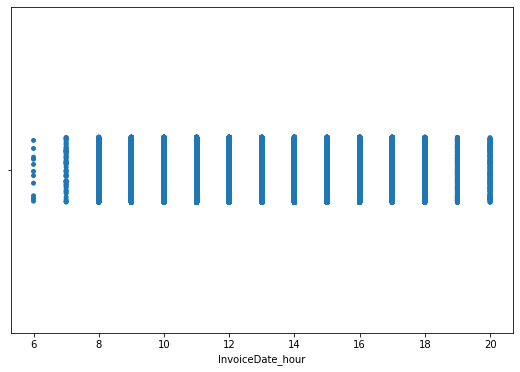

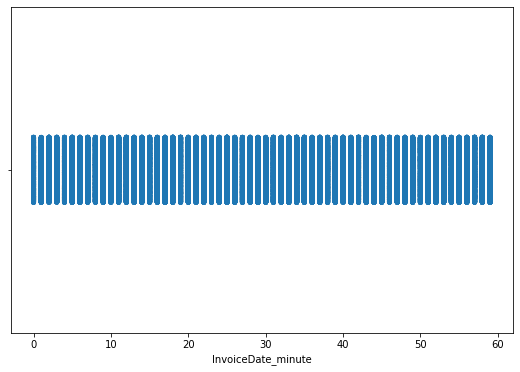

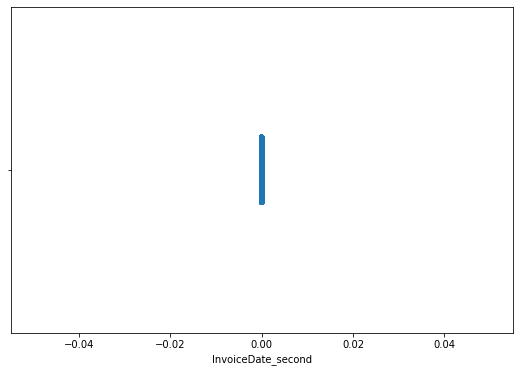

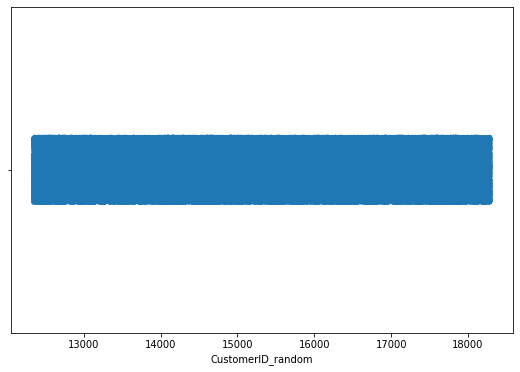

In [34]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

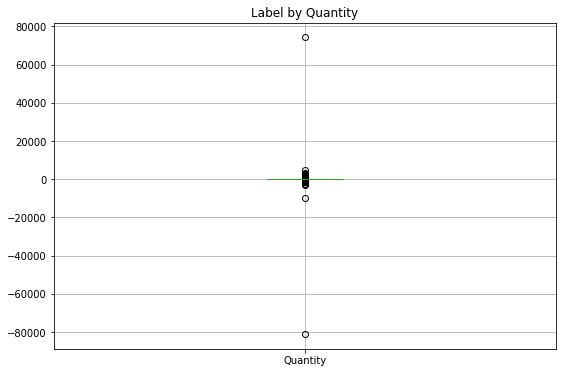

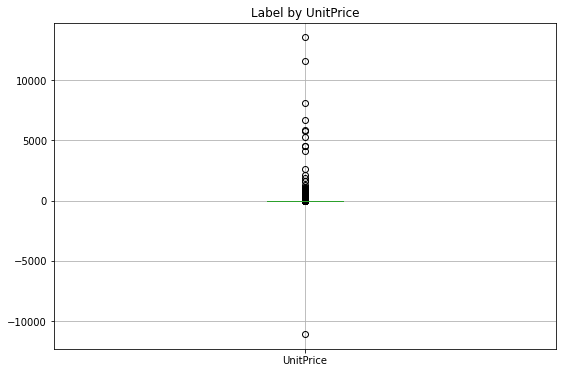

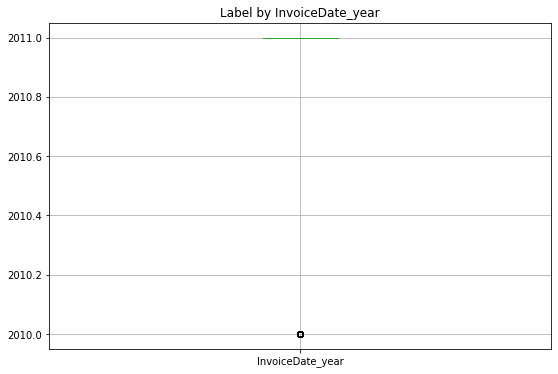

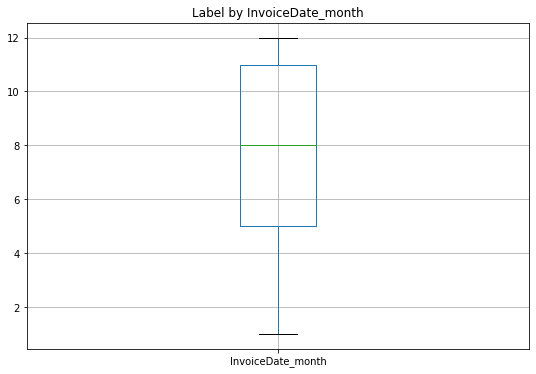

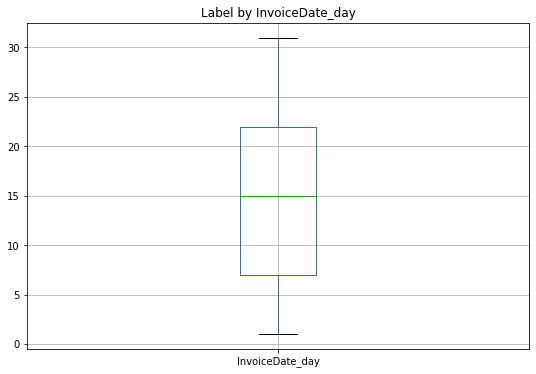

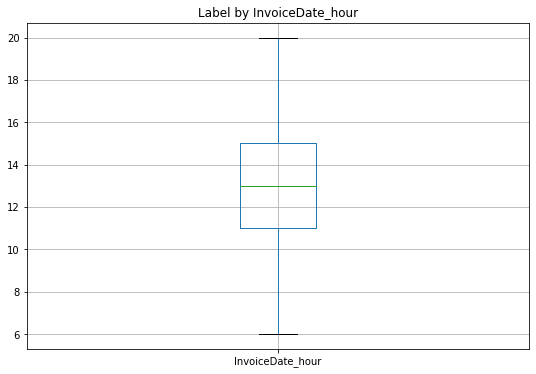

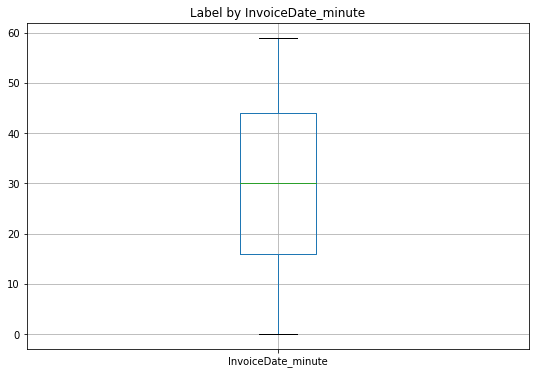

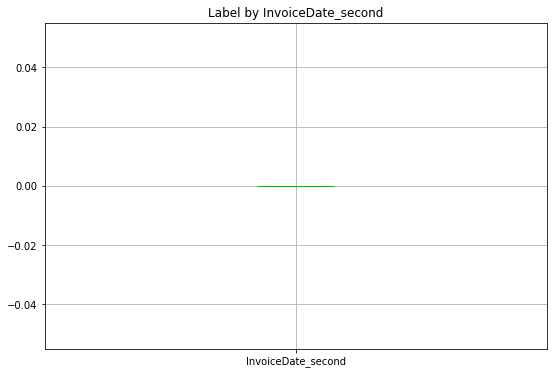

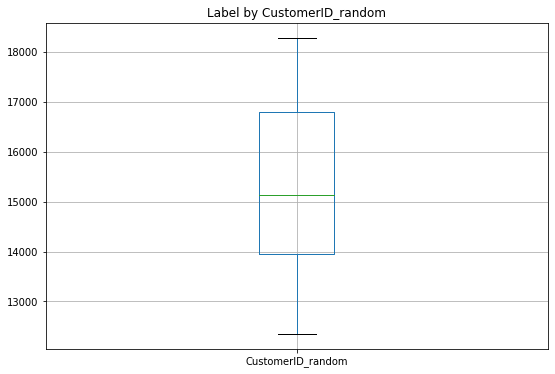

In [35]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

In [36]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

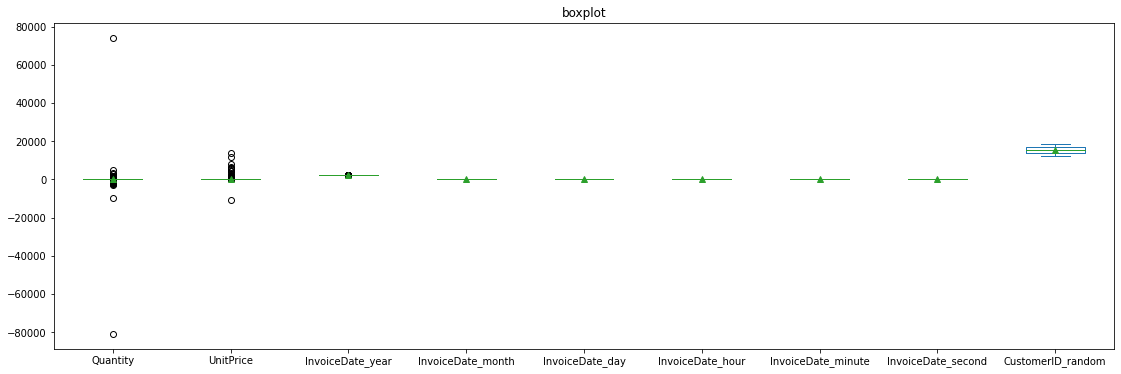

In [37]:
plt.rcParams['figure.figsize']=(19,6)
ax = dataset[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

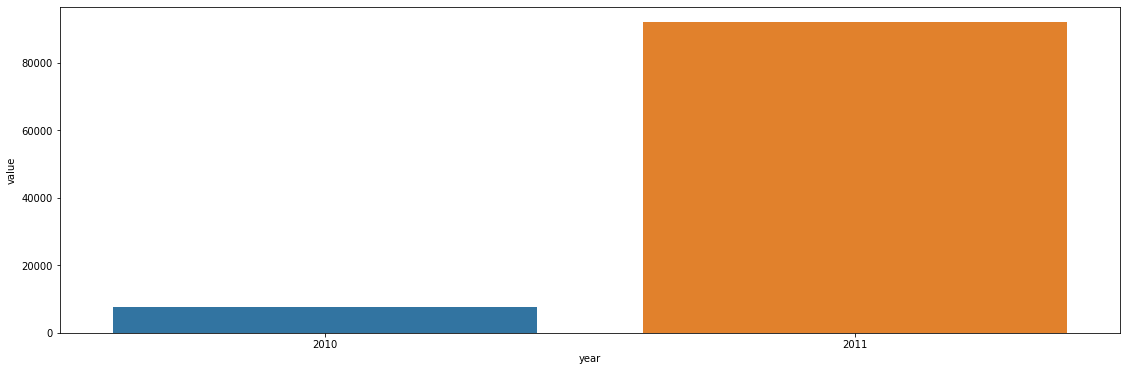

In [38]:
invb=pd.DataFrame({'year':[2011,2010],'value':[92011,7789]})
sns.barplot(y='value',x='year',data=invb)

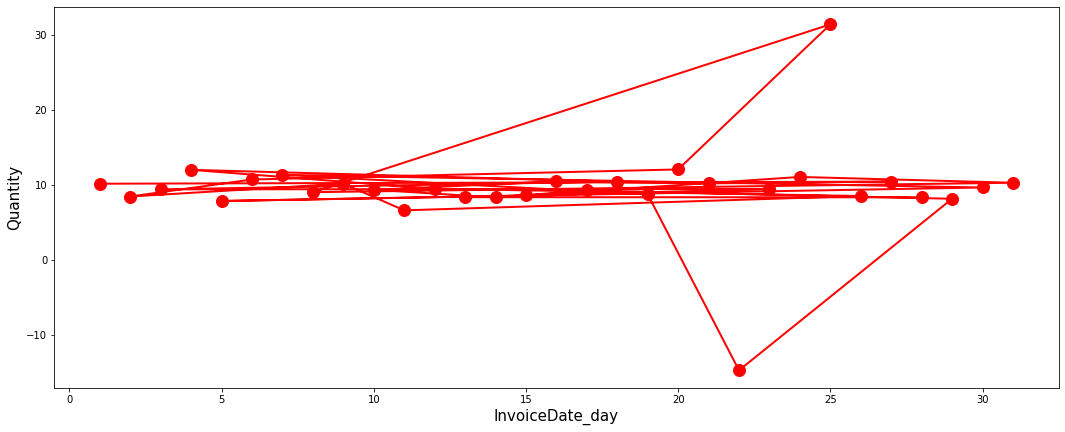

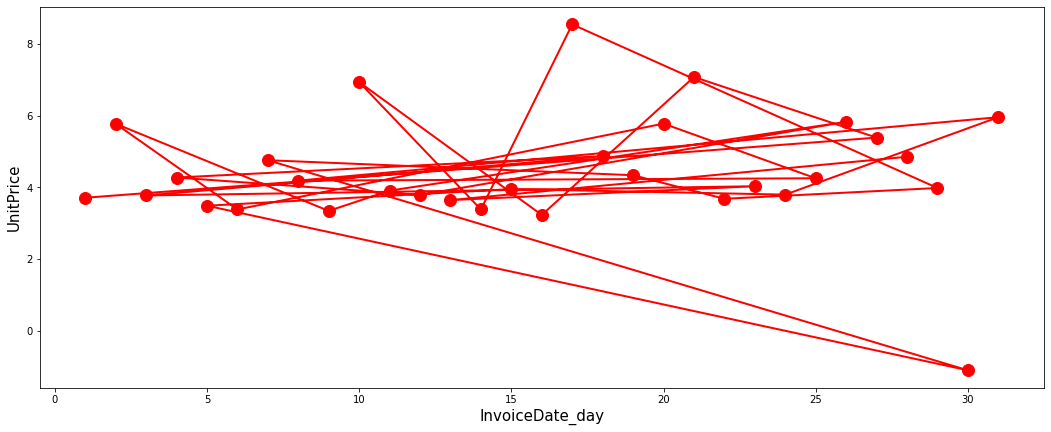

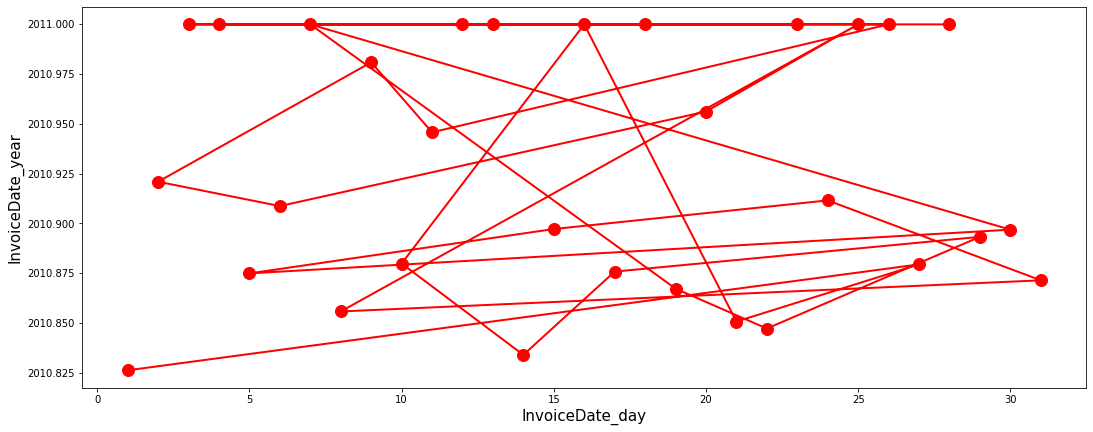

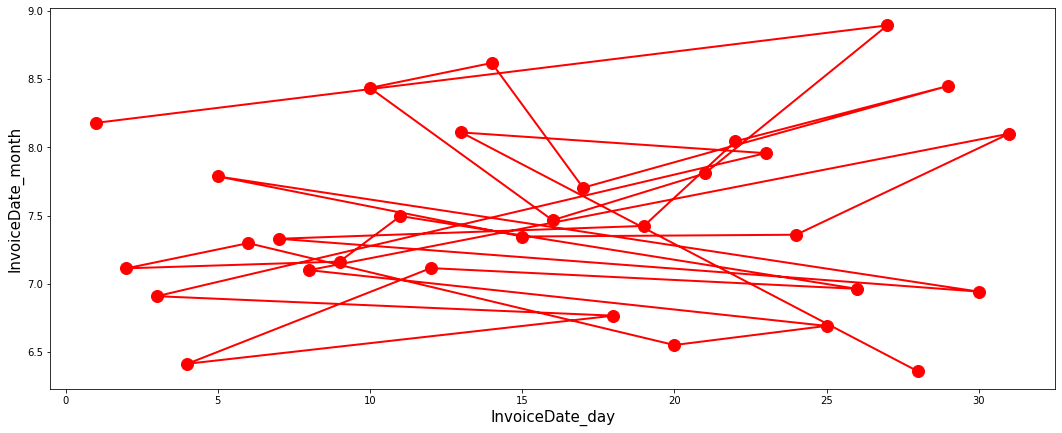

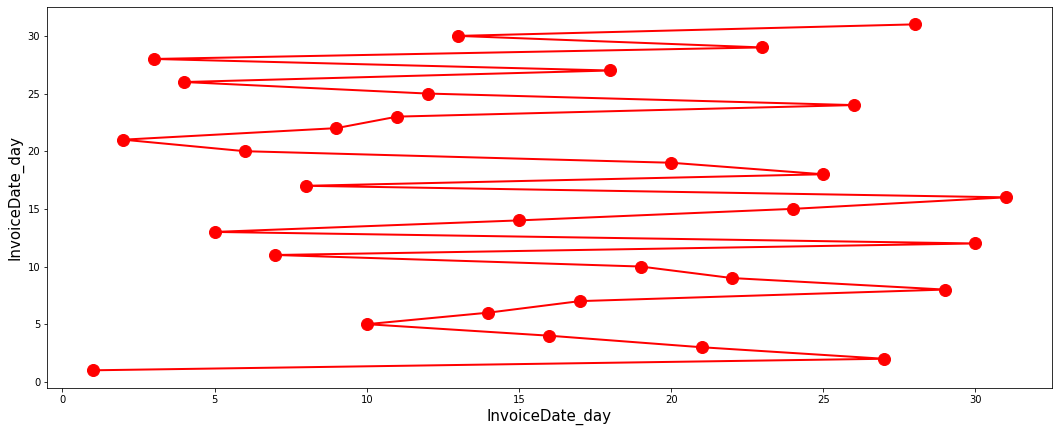

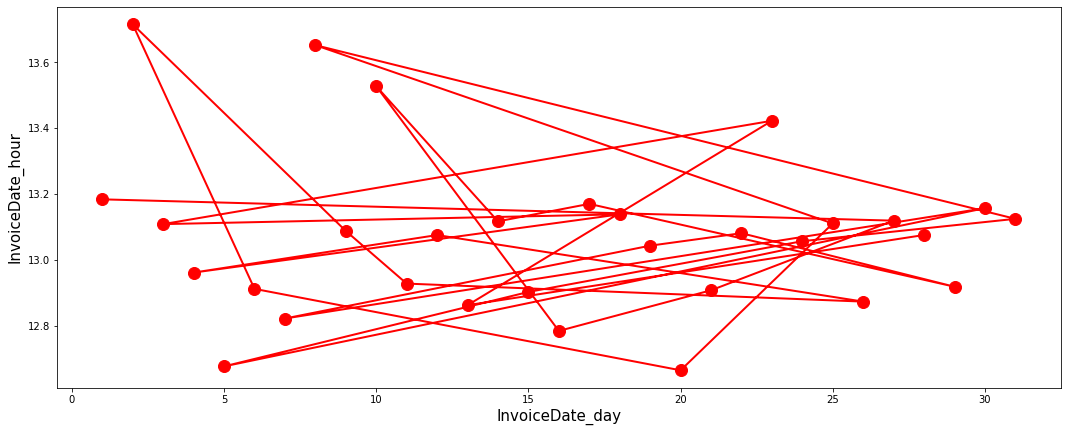

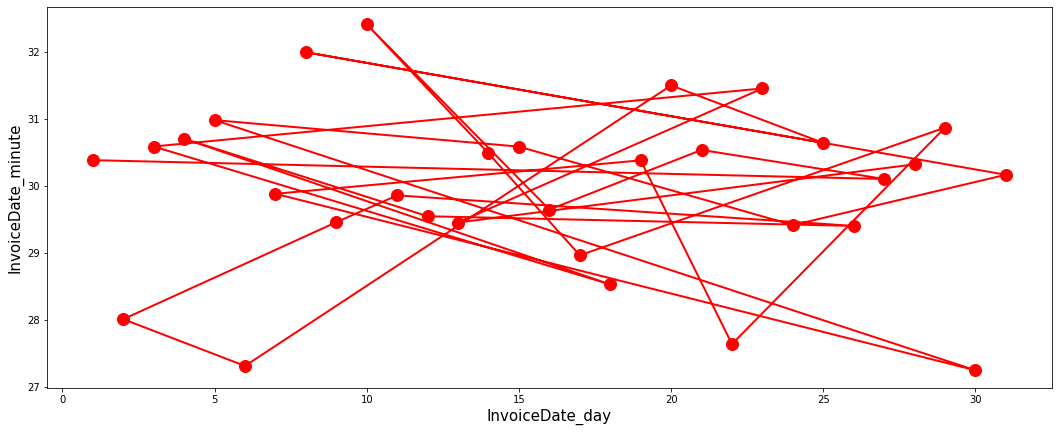

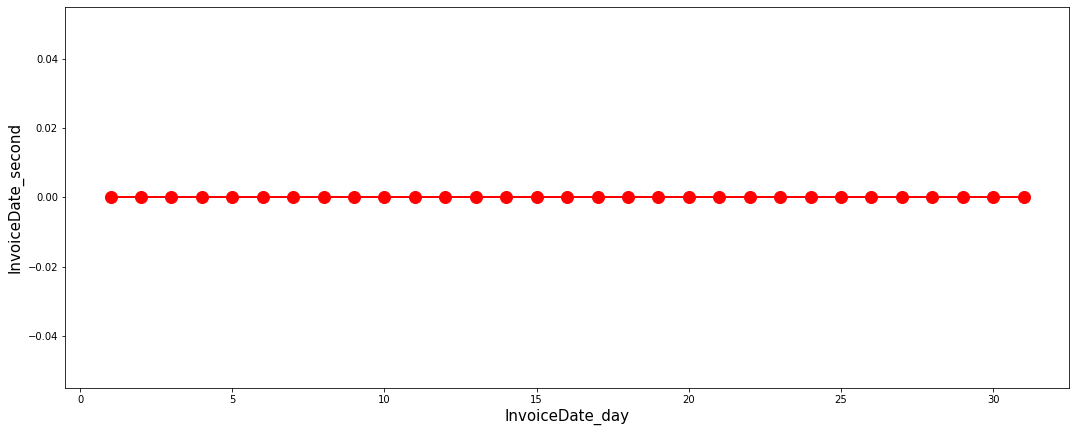

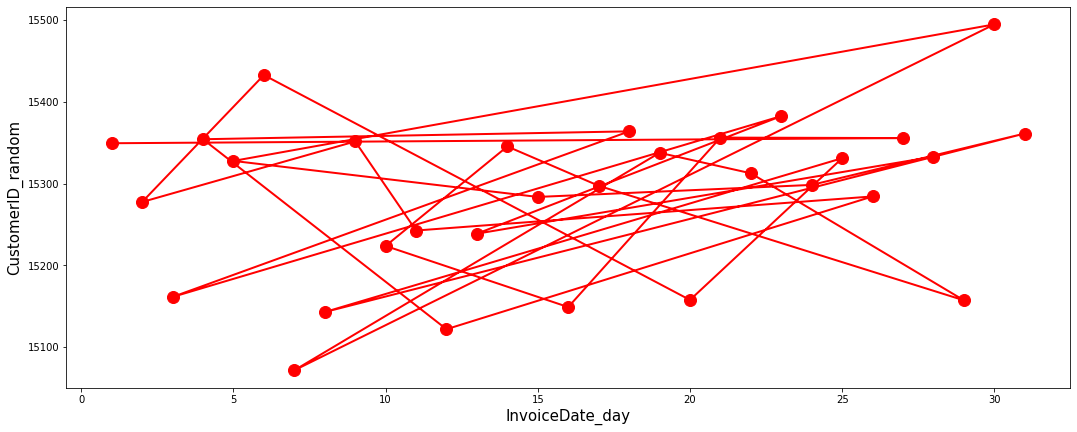

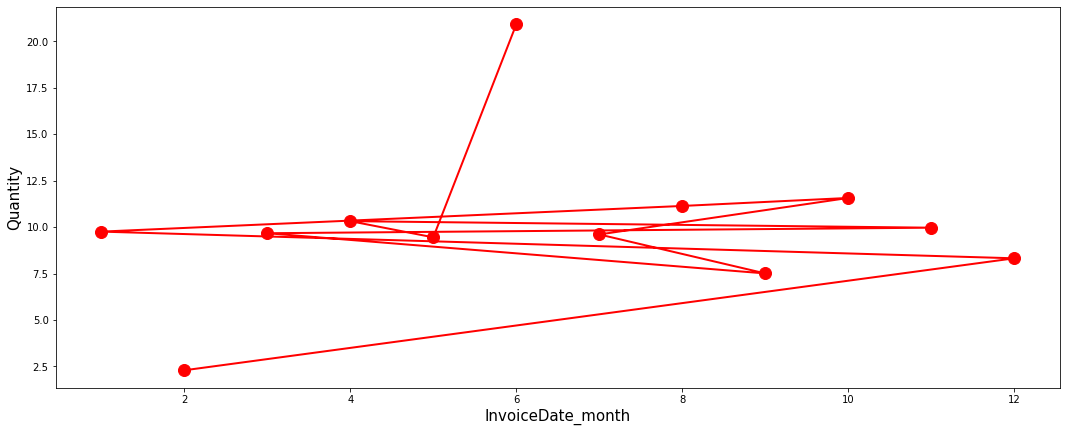

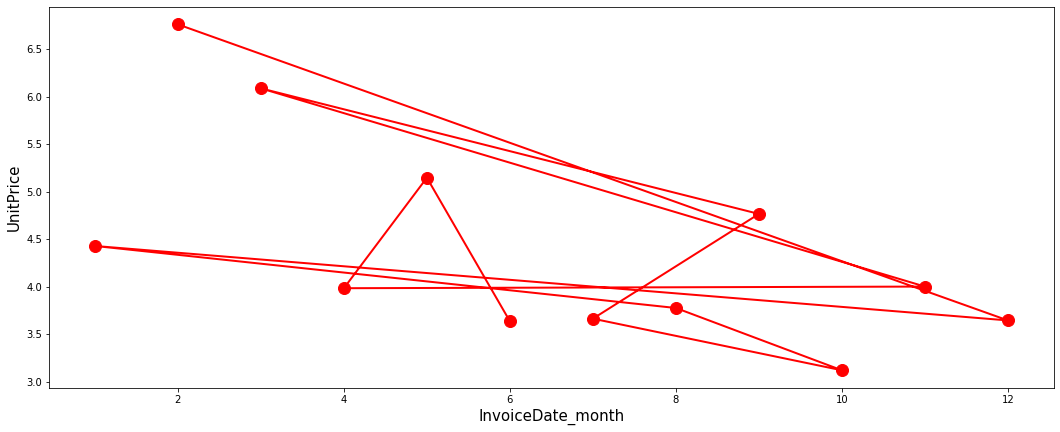

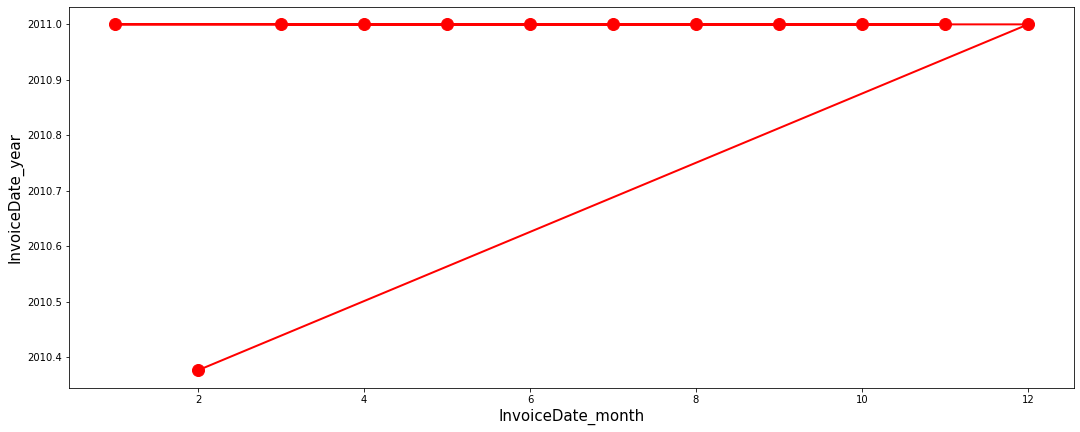

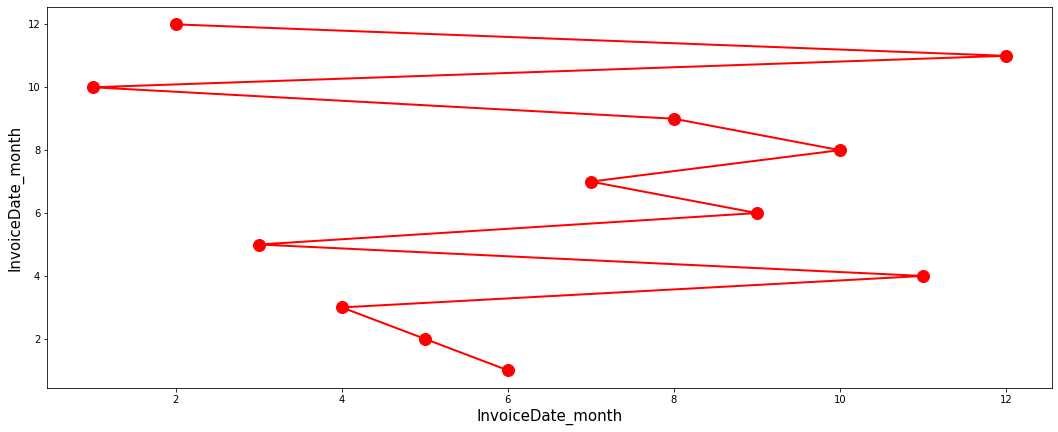

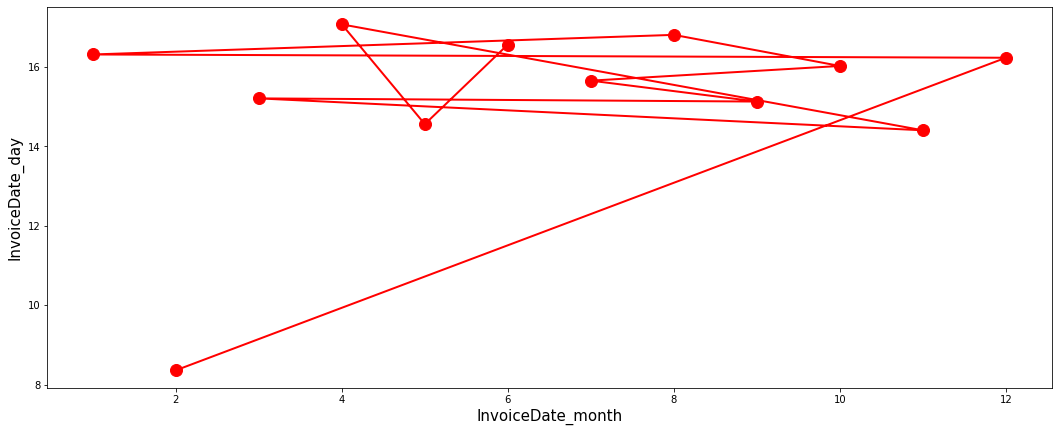

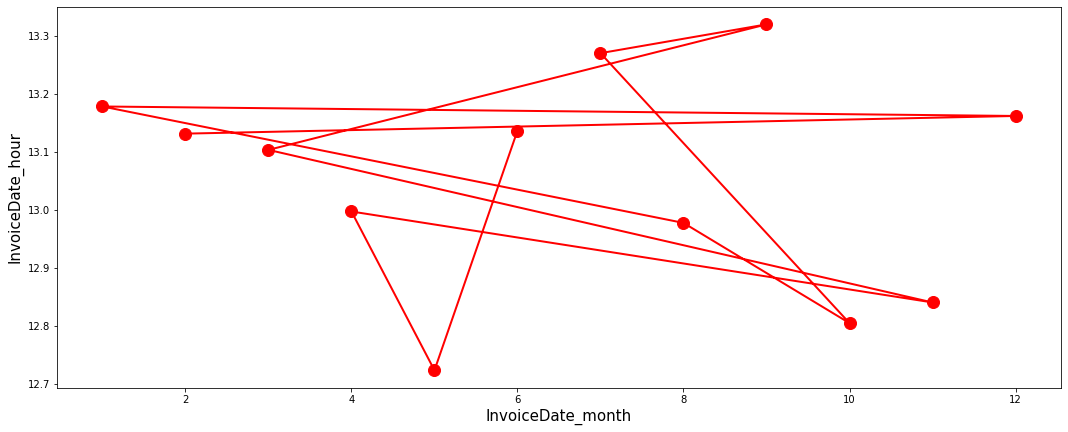

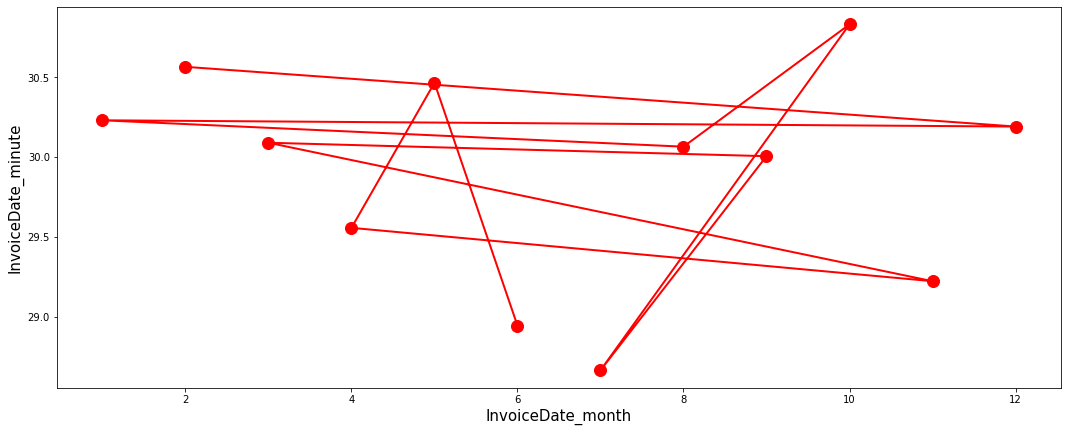

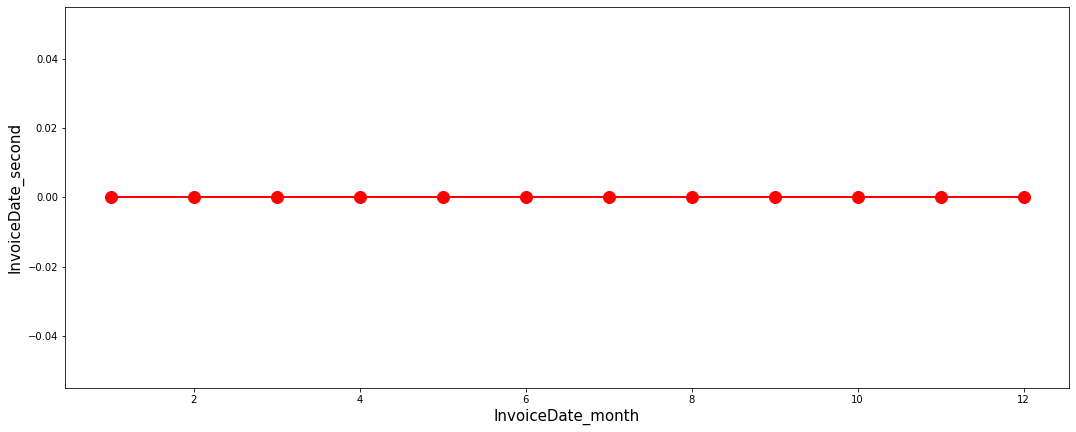

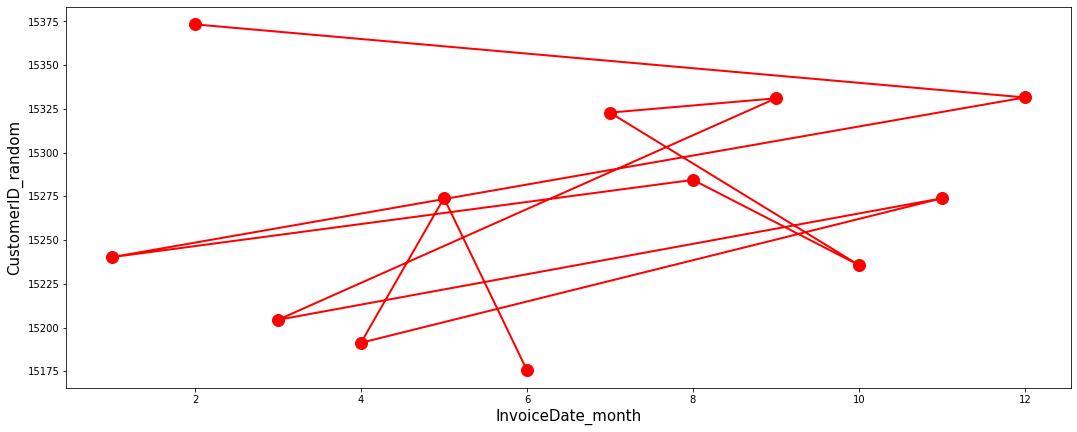

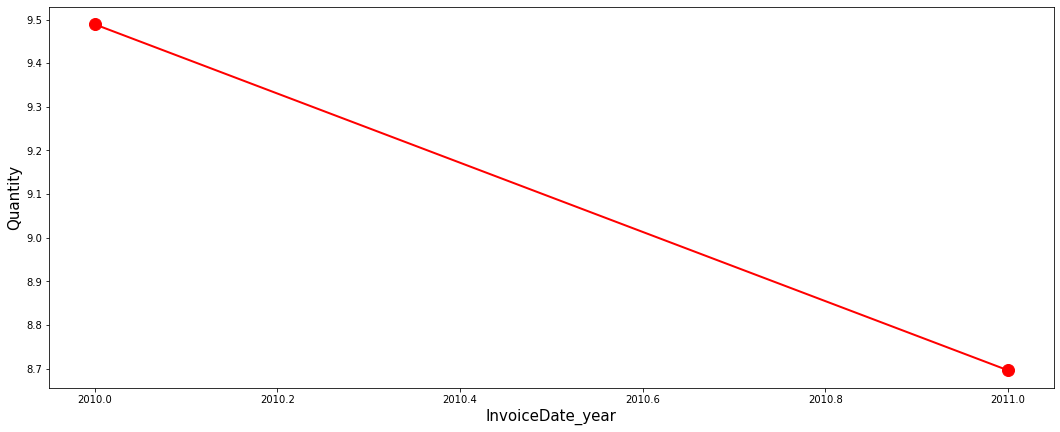

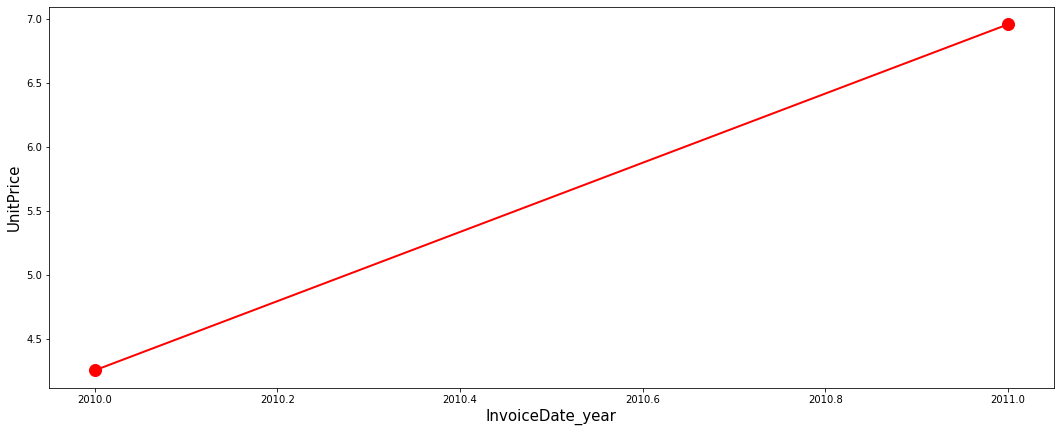

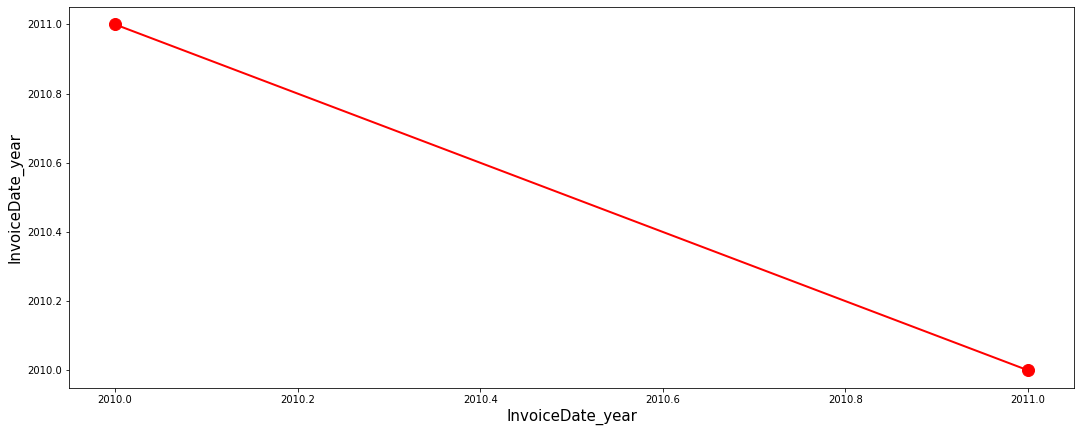

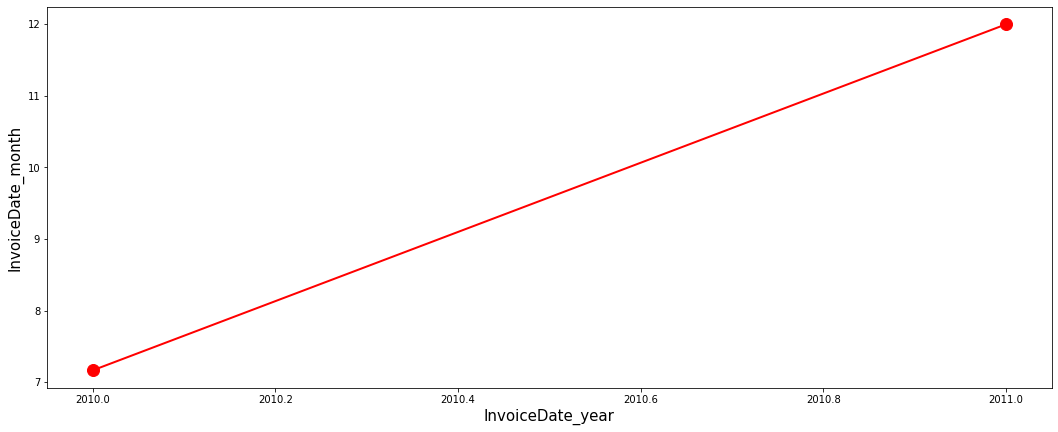

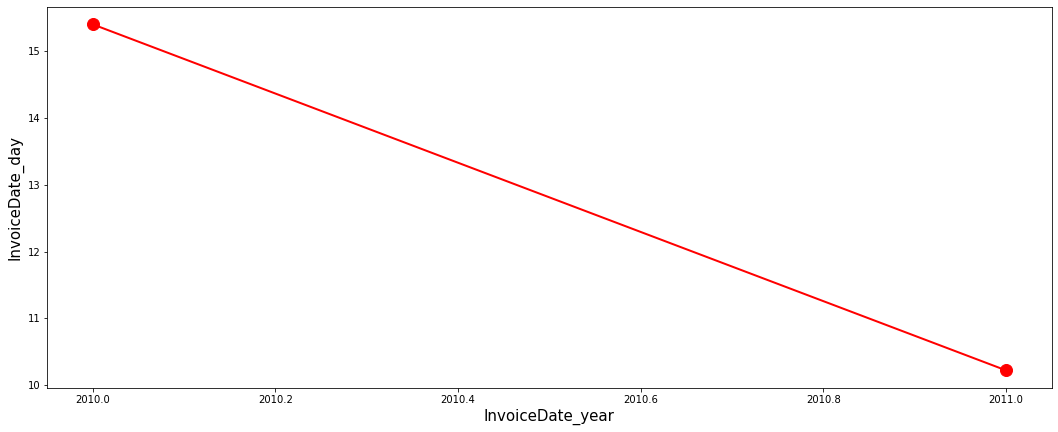

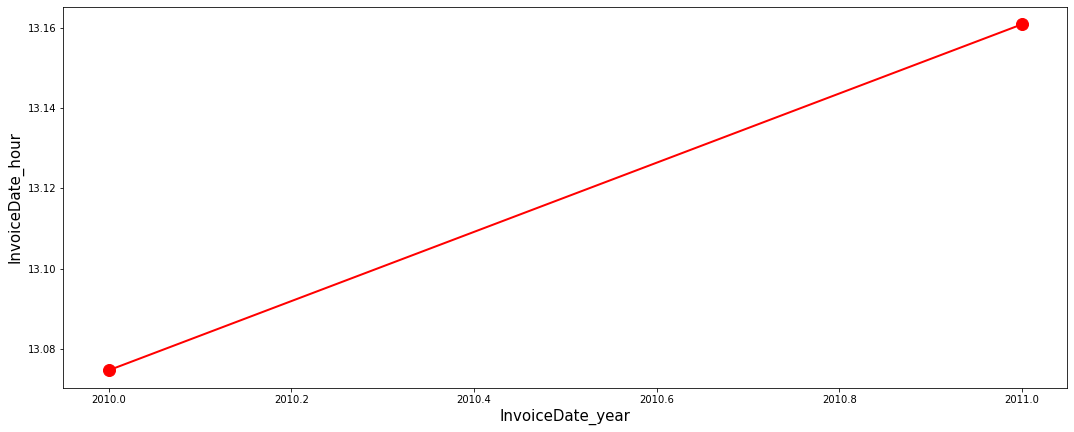

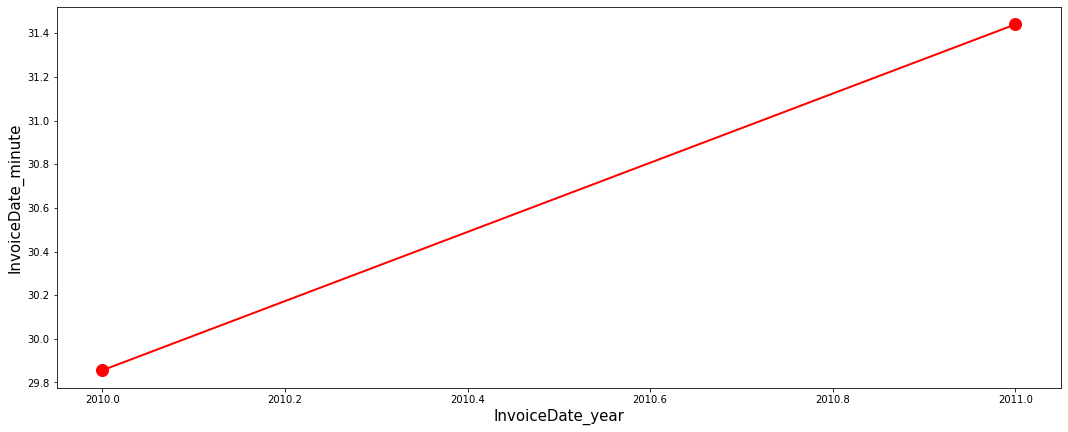

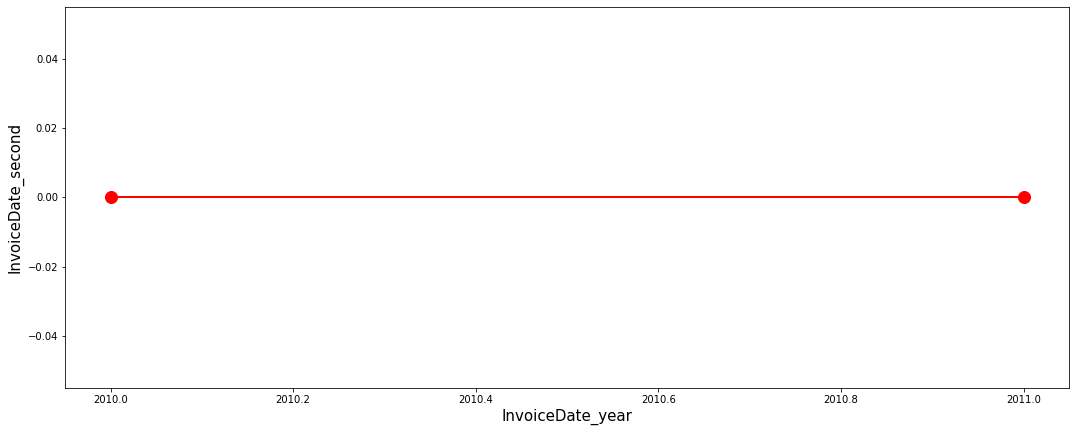

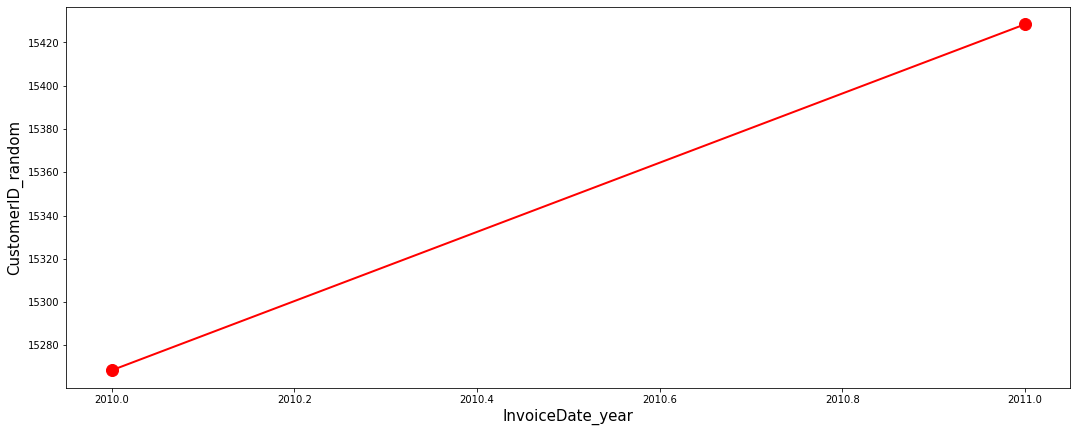

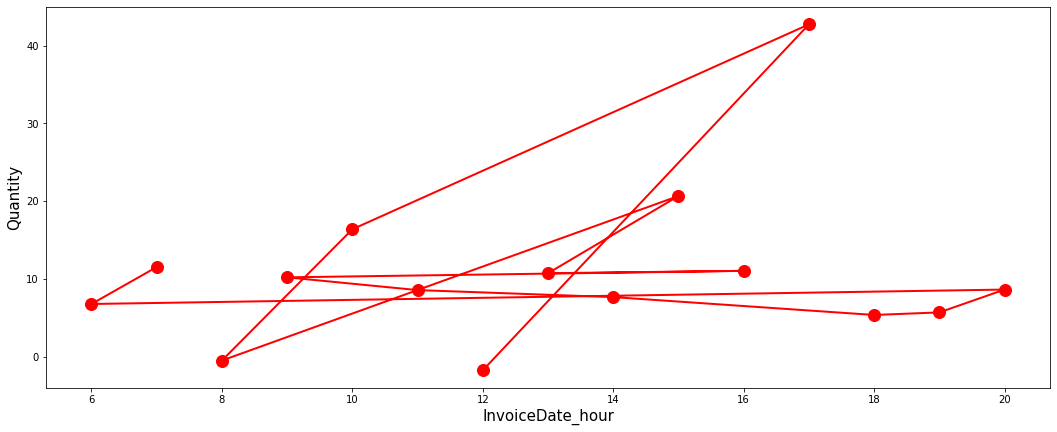

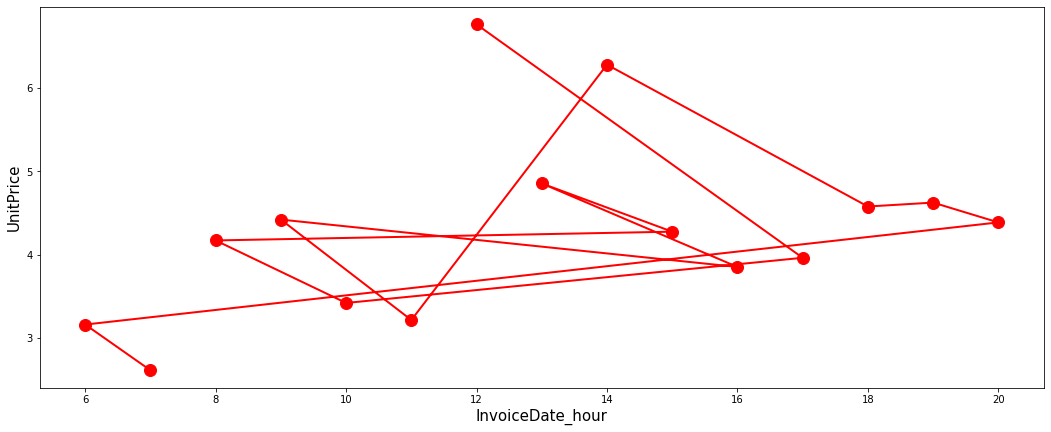

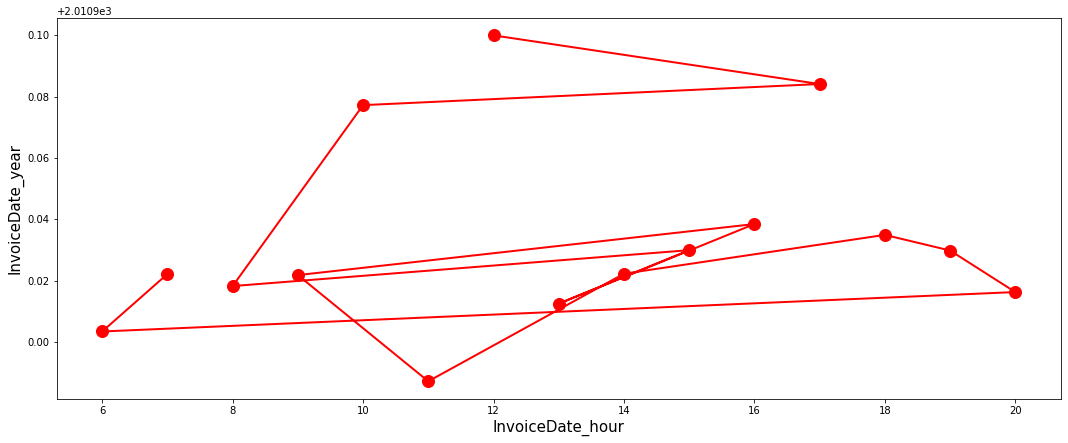

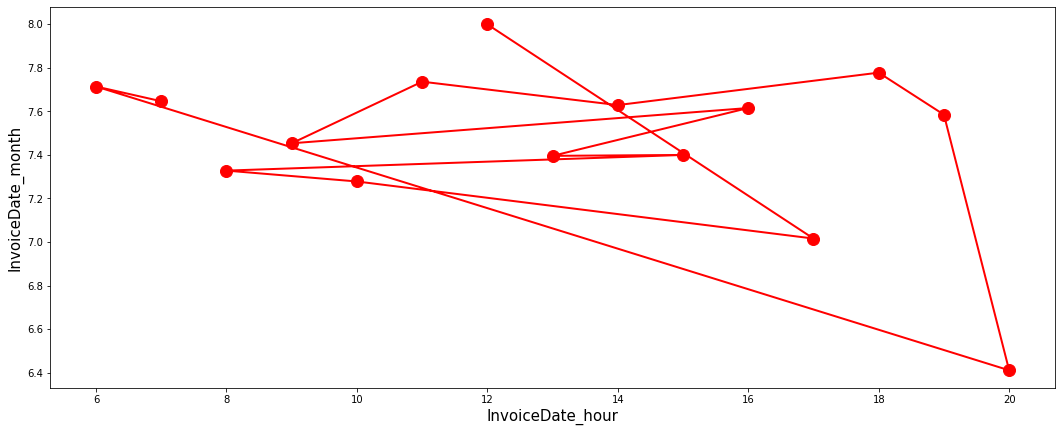

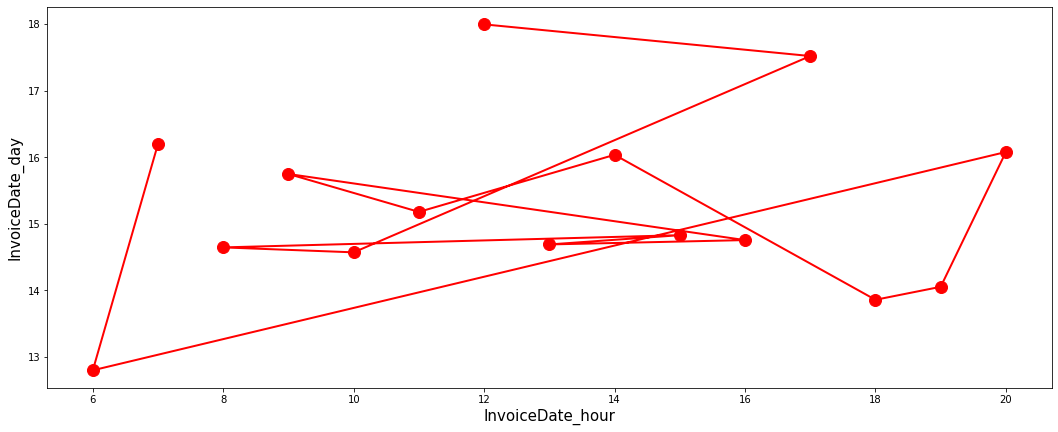

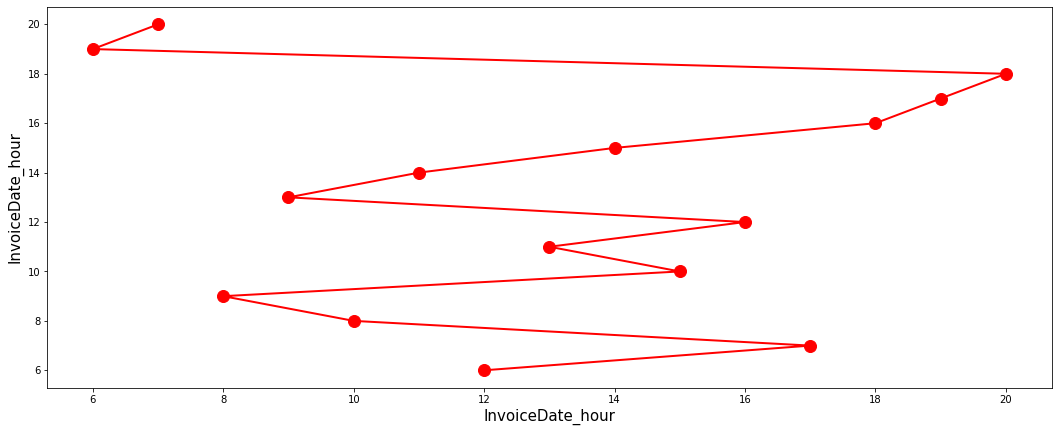

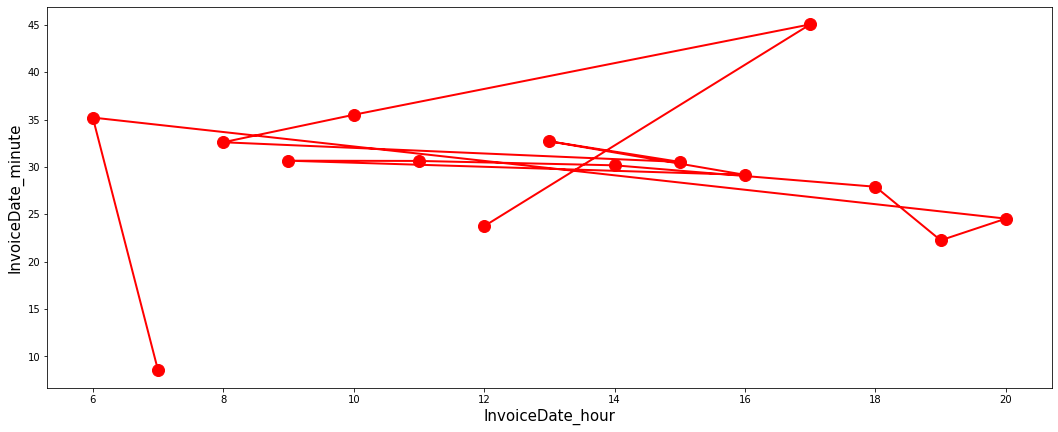

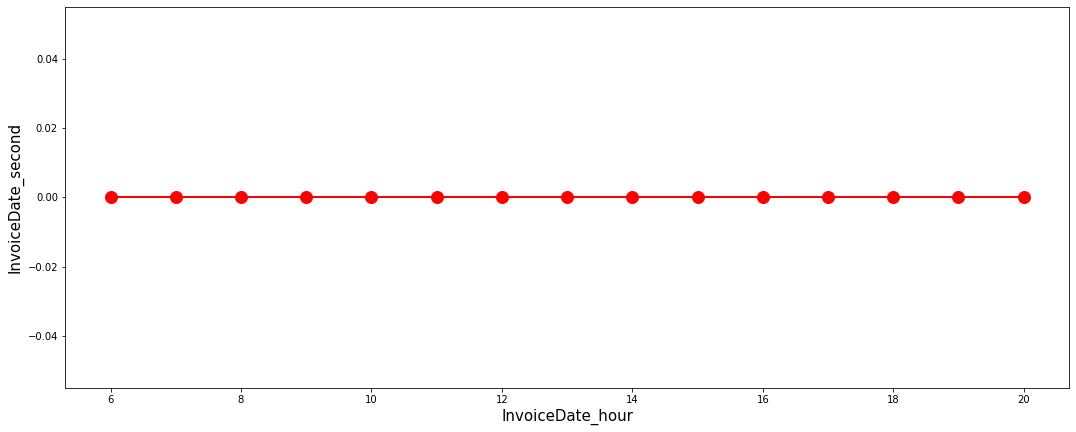

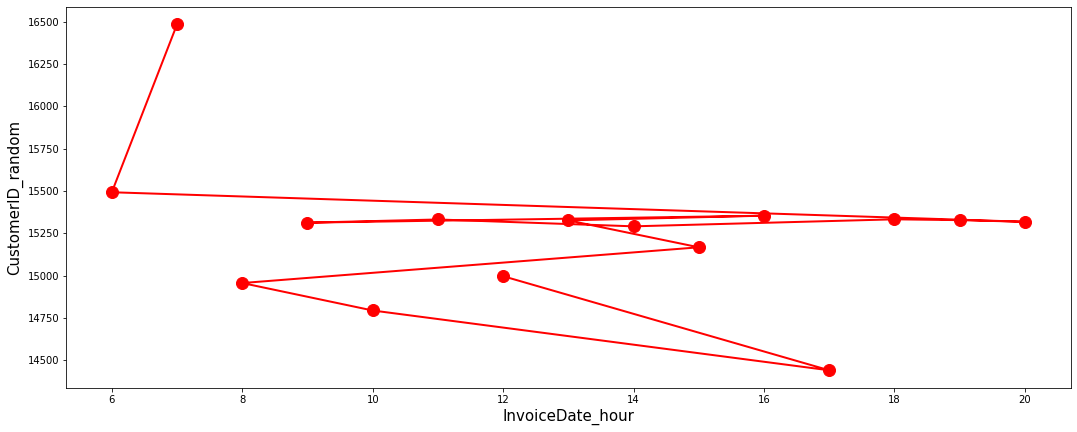

In [39]:
for i in ['InvoiceDate_day','InvoiceDate_month','InvoiceDate_year','InvoiceDate_hour']:
  for j in numerical_features:
    s1=dataset[i].unique()
    s2=dataset.groupby([i])[j].mean()

    plt.rcParams['figure.figsize'] = (18, 7)

    plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

  
    plt.xlabel(i, fontsize = 15)
    plt.ylabel(j, fontsize = 15)
    plt.show()

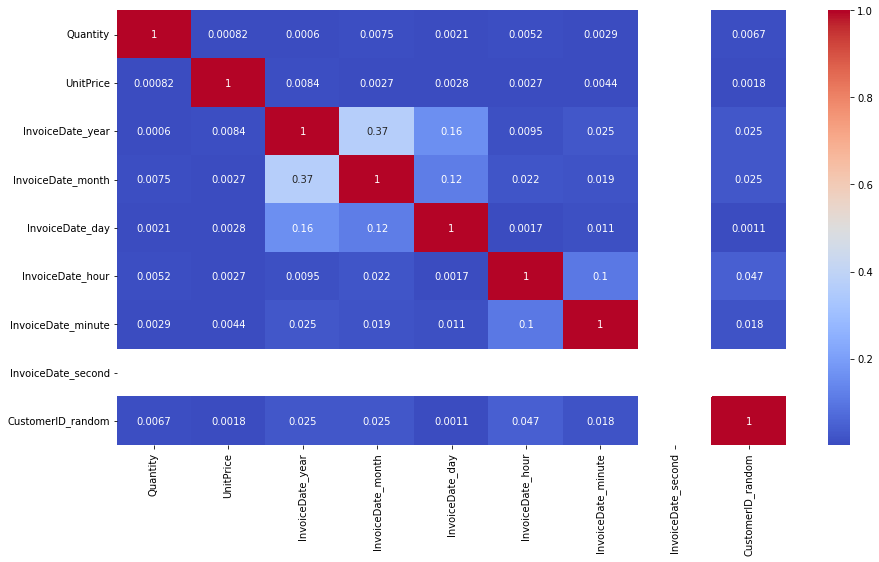

In [40]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Correlation Map**

In [41]:
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Quantity,UnitPrice,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,CustomerID_random
Quantity,1.00,-0.00,0.00,-0.01,0.00,-0.01,-0.00,nan,-0.01
UnitPrice,-0.00,1.00,-0.01,0.00,-0.00,0.00,-0.00,nan,-0.00
InvoiceDate_year,0.00,-0.01,1.00,-0.37,0.16,-0.01,-0.03,nan,-0.02
InvoiceDate_month,-0.01,0.00,-0.37,1.00,-0.12,0.02,0.02,nan,0.02
InvoiceDate_day,0.00,-0.00,0.16,-0.12,1.00,0.00,-0.01,nan,-0.00
InvoiceDate_hour,-0.01,0.00,-0.01,0.02,0.00,1.00,-0.10,nan,0.05
InvoiceDate_minute,-0.00,-0.00,-0.03,0.02,-0.01,-0.10,1.00,nan,-0.02
InvoiceDate_second,nan,nan,nan,nan,nan,nan,nan,nan,nan
CustomerID_random,-0.01,-0.00,-0.02,0.02,-0.00,0.05,-0.02,nan,1.00


# Handling Categorical Features

In [42]:
# Catagorical
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,CustomerID_random
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,United Kingdom,2011,6,1,12,5,0,17315.0
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,United Kingdom,2011,5,27,17,14,0,14031.0
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,United Kingdom,2011,4,21,17,5,0,14031.0
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,United Kingdom,2011,11,16,10,39,0,17198.0
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,United Kingdom,2011,3,10,8,40,0,13502.0


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99800 entries, 209268 to 290024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           99800 non-null  object        
 1   StockCode           99800 non-null  object        
 2   Description         99800 non-null  object        
 3   Quantity            99800 non-null  int64         
 4   InvoiceDate         99800 non-null  datetime64[ns]
 5   UnitPrice           99800 non-null  float64       
 6   Country             99800 non-null  object        
 7   InvoiceDate_year    99800 non-null  int64         
 8   InvoiceDate_month   99800 non-null  int64         
 9   InvoiceDate_day     99800 non-null  int64         
 10  InvoiceDate_hour    99800 non-null  int64         
 11  InvoiceDate_minute  99800 non-null  int64         
 12  InvoiceDate_second  99800 non-null  int64         
 13  CustomerID_random   99800 non-null  floa

In [44]:
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

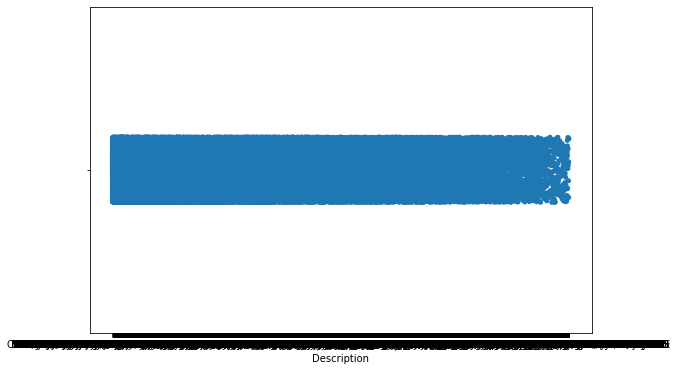

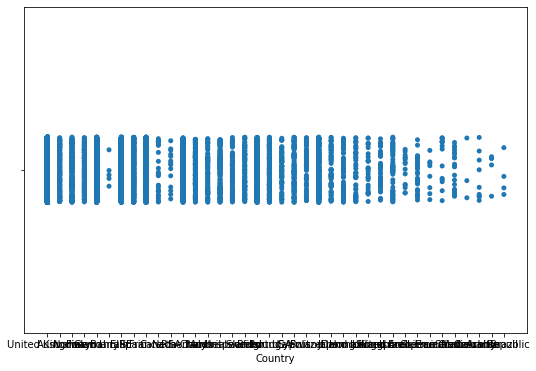

In [45]:
for col in [  'Description', 'Country']:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

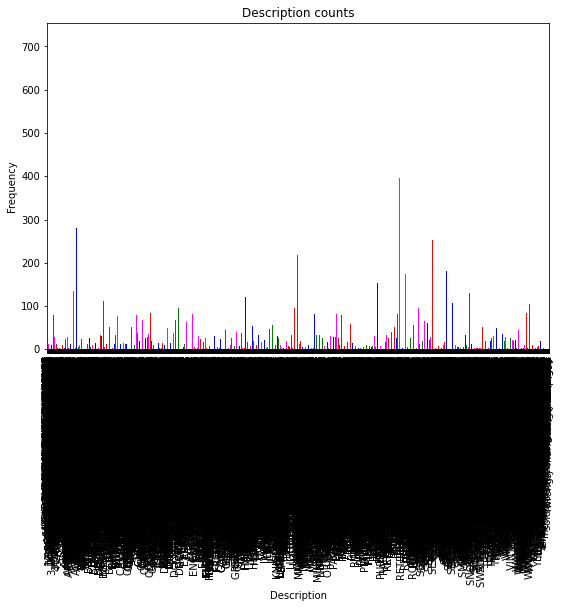

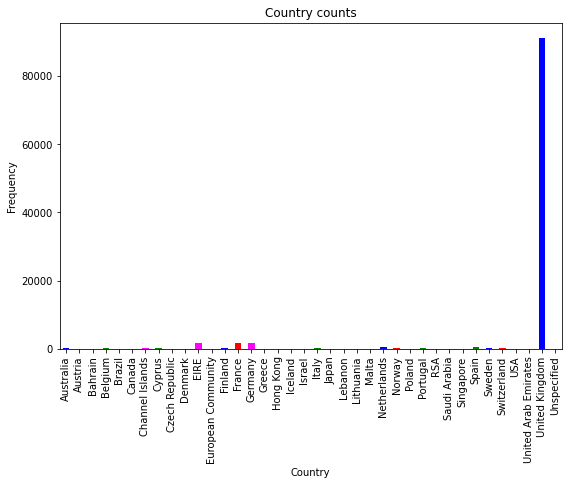

In [46]:
# plot a bar plot for each categorical feature count 

for col in  [  'Description', 'Country']:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color=['blue','red','magenta','g'])
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

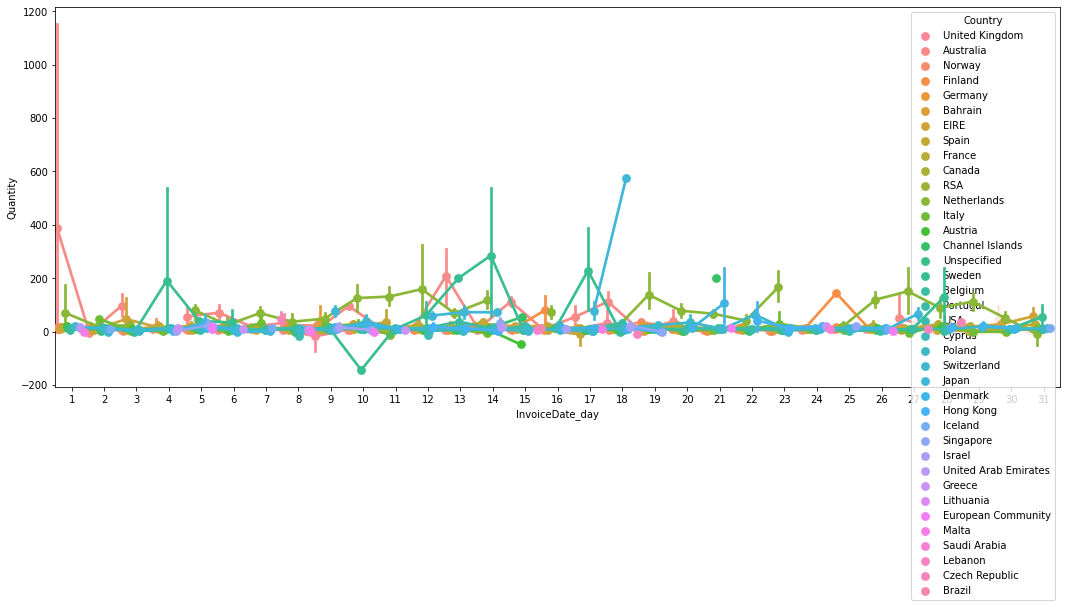

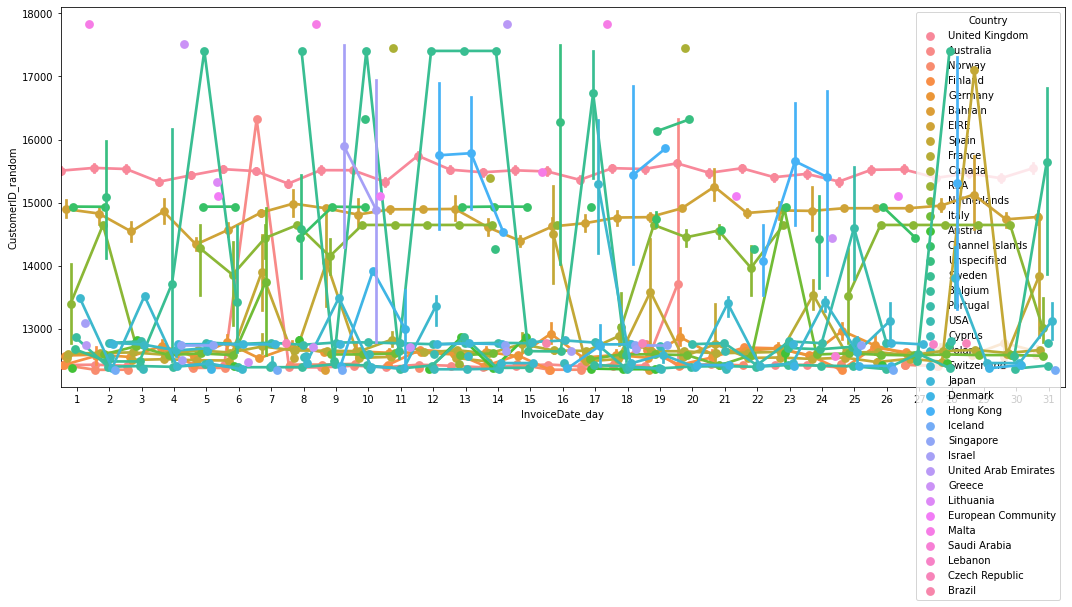

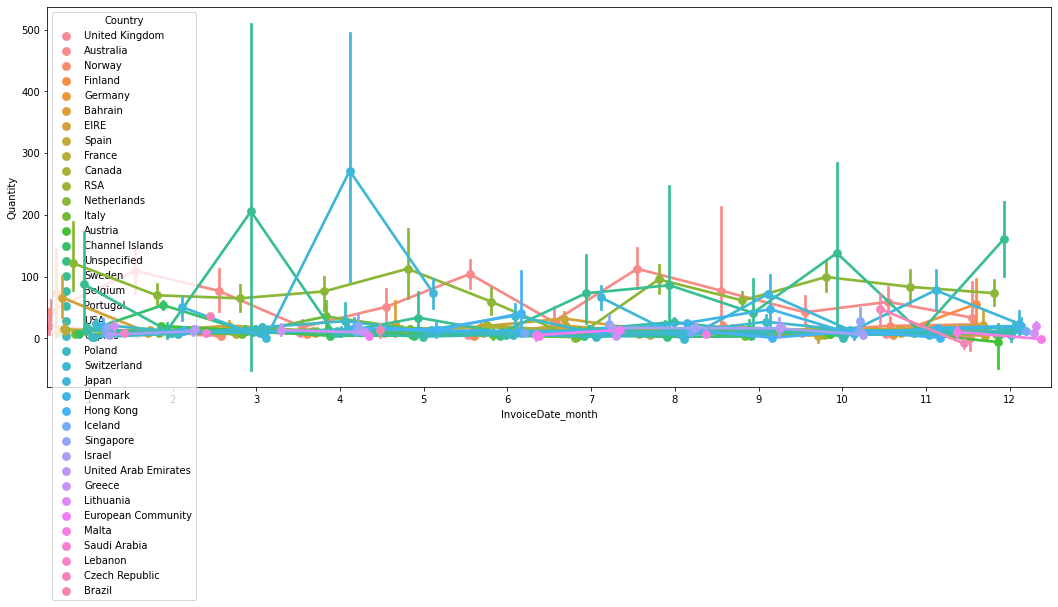

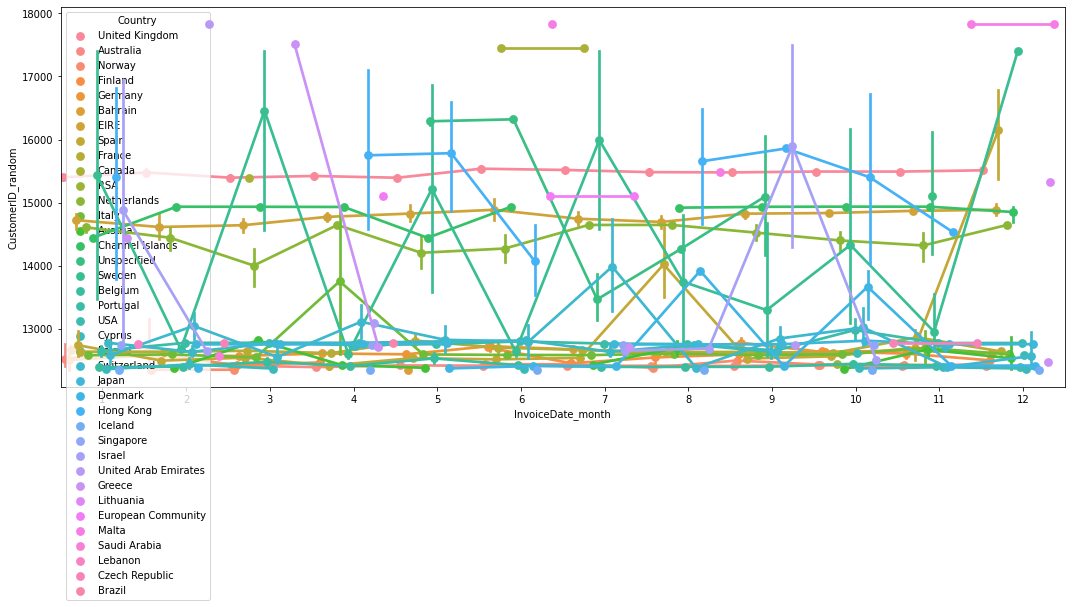

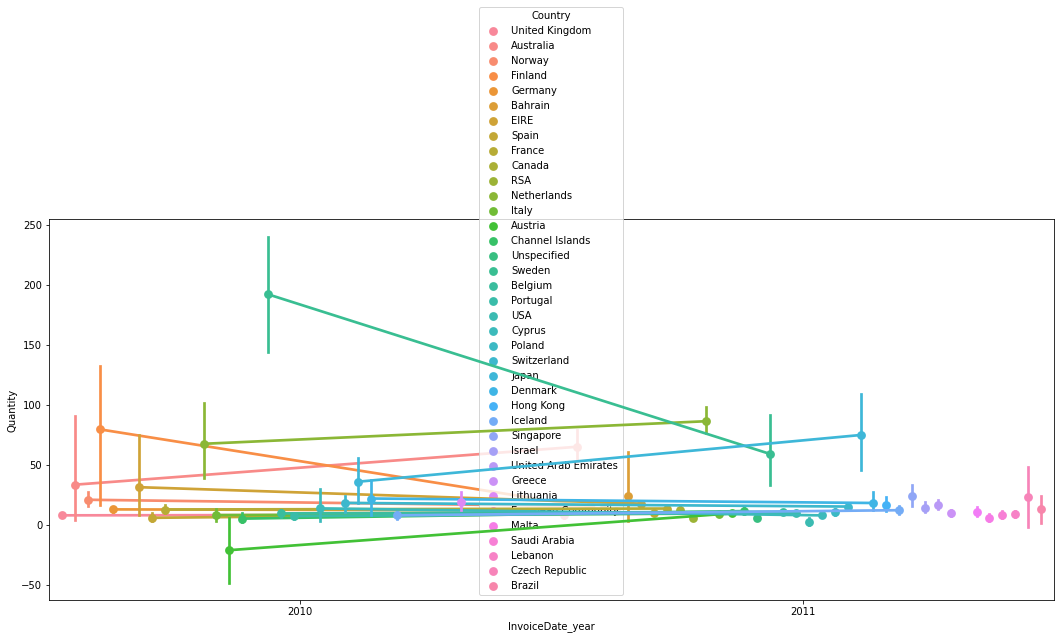

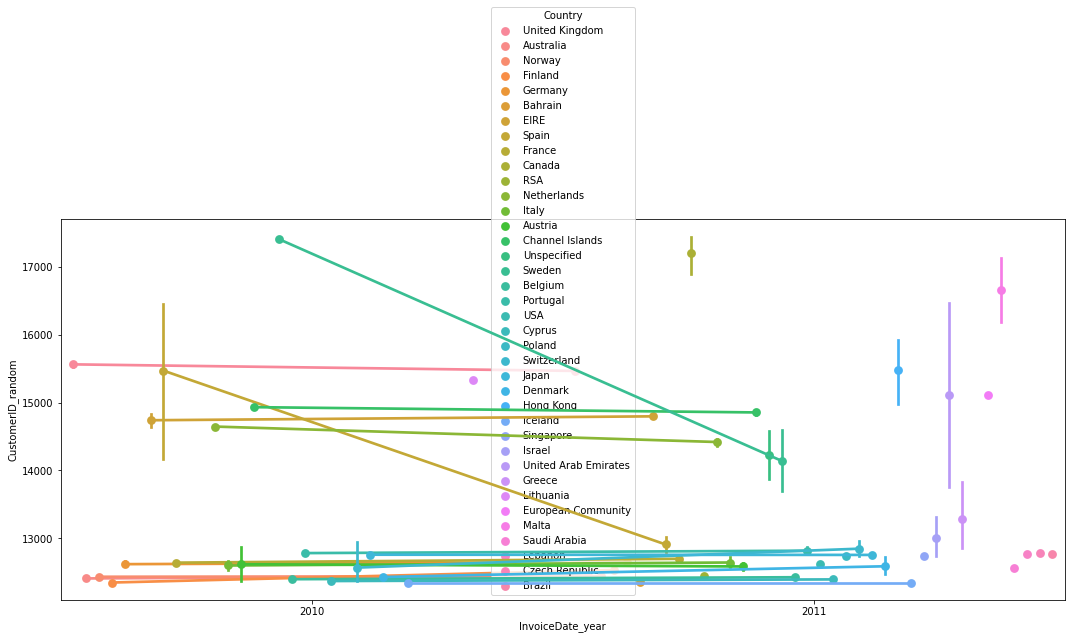

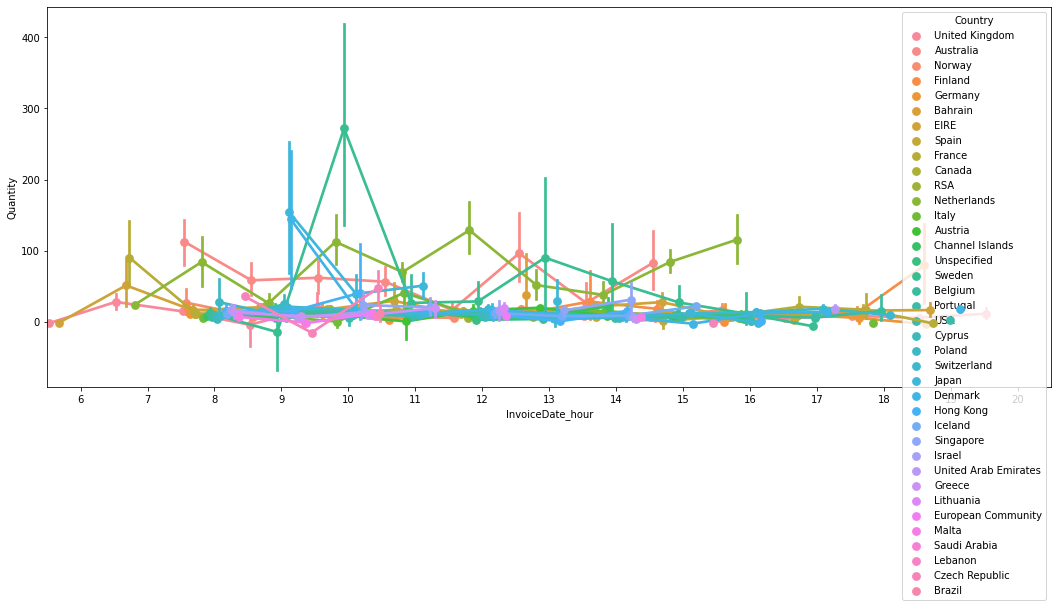

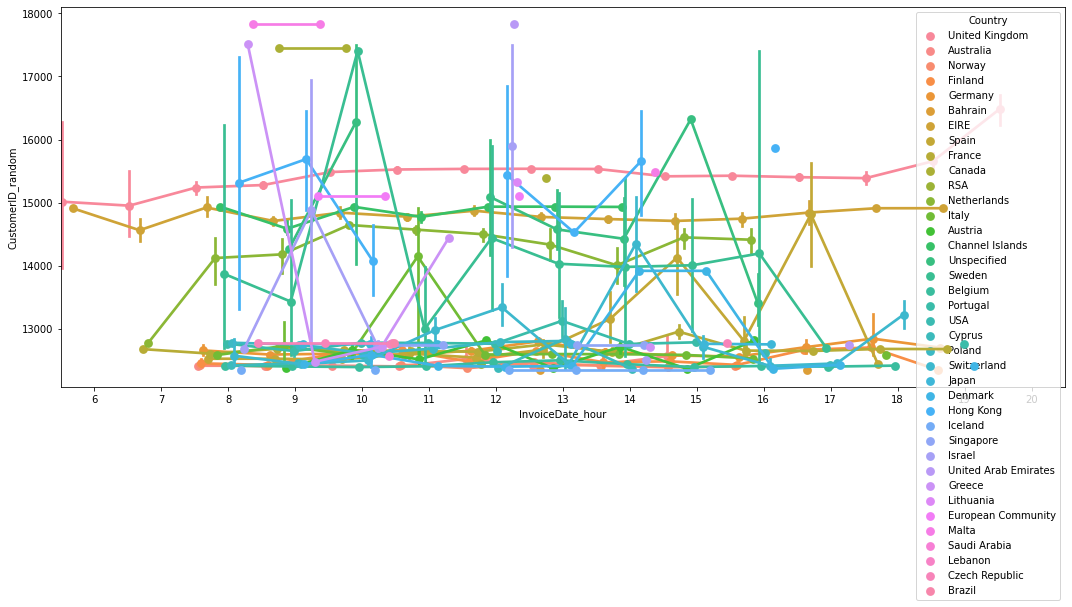

In [47]:
for i in ['InvoiceDate_day','InvoiceDate_month','InvoiceDate_year','InvoiceDate_hour']:
  ax = sns.pointplot(x=i, y="Quantity", hue="Country",
                   data=dataset, dodge=True)
  plt.show()
  

  ax = sns.pointplot(x=i, y="CustomerID_random", hue="Country",
                   data=dataset, dodge=True)
  plt.show()
  

# RFM Table

R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

In [48]:
# Convert to show date only
from datetime import datetime
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date
# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]
# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)
# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'}).reset_index()
# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [49]:
customers.head(10)

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,3,27,588.48
2,12348.0,319,5,443.52
3,12349.0,19,15,578.21
4,12350.0,311,2,42.90
5,12352.0,37,19,506.68
6,12353.0,205,2,59.70
7,12354.0,233,6,94.45
8,12355.0,215,3,165.30
9,12356.0,246,7,427.40


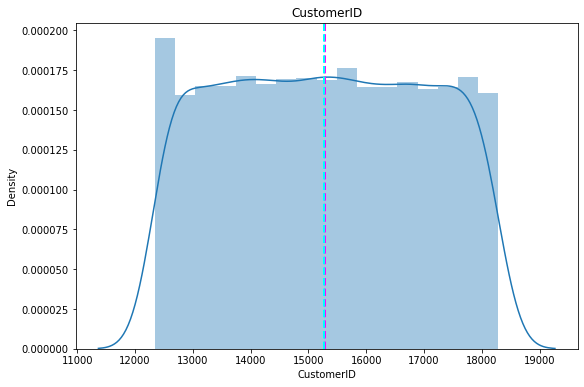

Skewness : 0.0076522952748913275
Kurtosis : -1.193708598479697


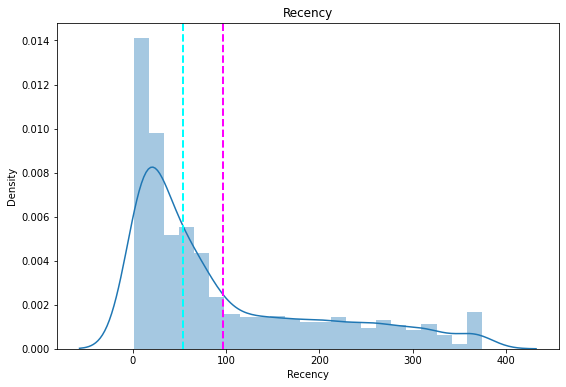

Skewness : 1.1894093874114786
Kurtosis : 0.2604433473318766


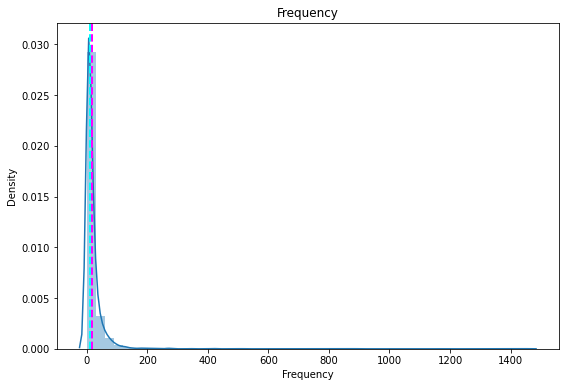

Skewness : 17.707469730773248
Kurtosis : 455.77098759018554


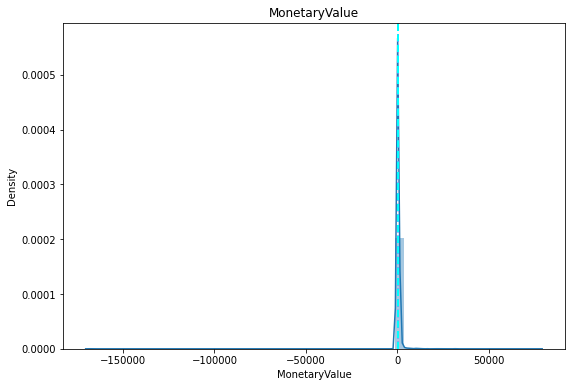

Skewness : -25.901704678922723
Kurtosis : 1691.9041935420605


In [50]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in ["CustomerID","Recency","Frequency","MonetaryValue"]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customers[col])
  sns.distplot(customers[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customers[col].skew())
  print( "Kurtosis :",customers[col].kurt())

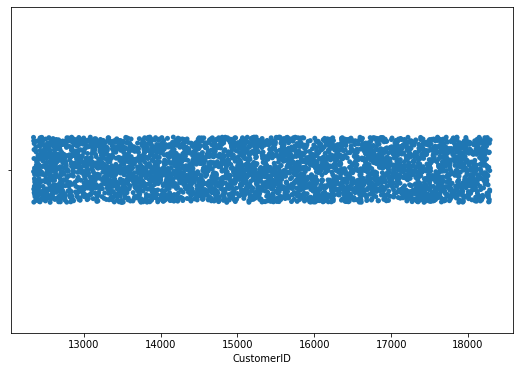

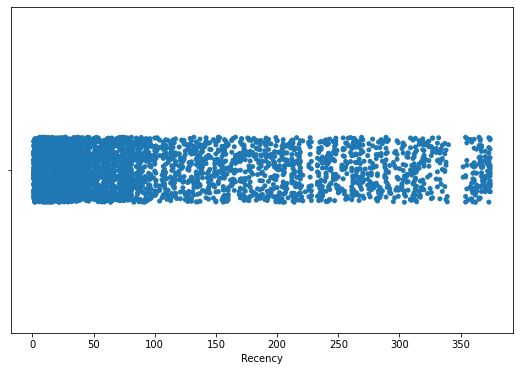

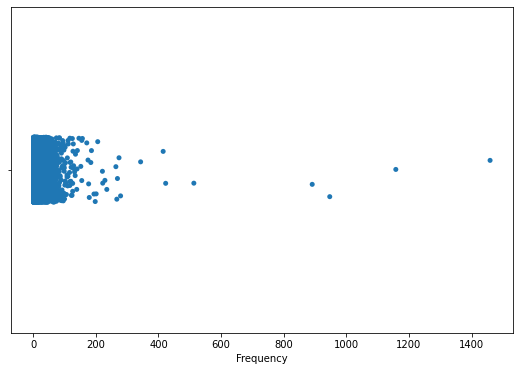

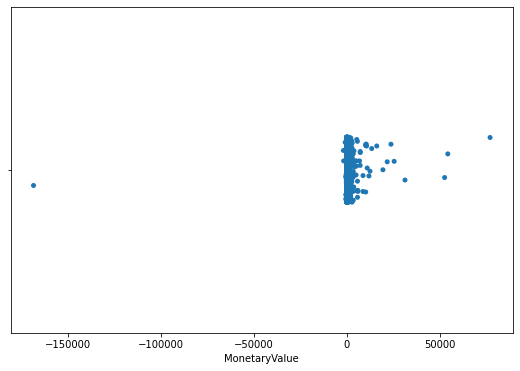

In [51]:
for col in ["CustomerID","Recency","Frequency","MonetaryValue"]:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(customers[col])

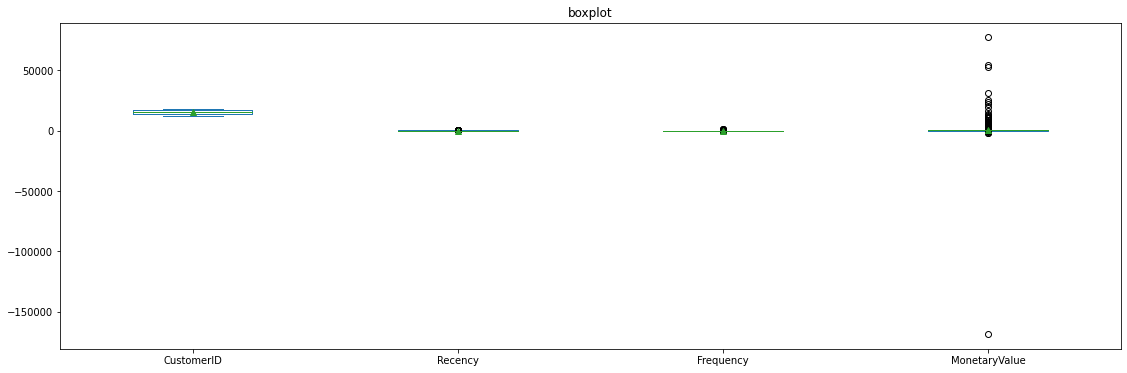

In [52]:
plt.rcParams['figure.figsize']=(19,6)
ax = customers[["CustomerID","Recency","Frequency","MonetaryValue"]].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

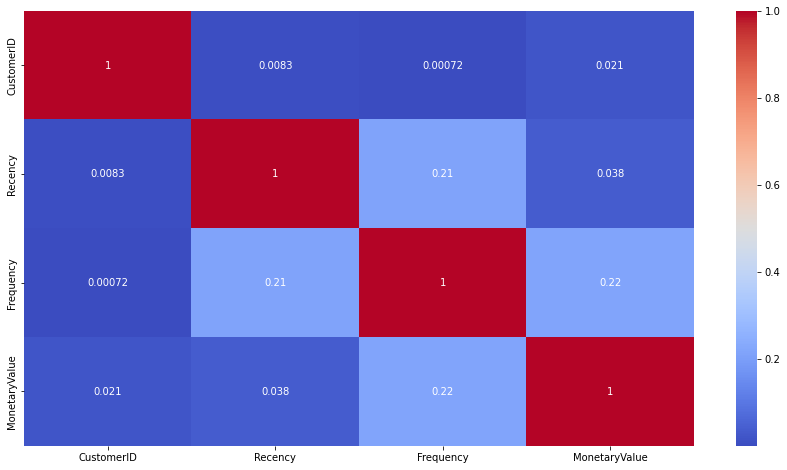

In [53]:
## Correlation
plt.figure(figsize=(15,8))
correlation=customers.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# Outlier Treatment

In [54]:
dataset_l=dataset.copy()

# For Quite Symmetric Features